In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import warnings

# Suppress potential warnings from scikit-learn
warnings.filterwarnings('ignore')

# --- 1. Instructions: Ensure you have saved your best model ---
# This script assumes you have already saved your final, best-performing model
# from the stacking ensemble analysis.
# In your Jupyter notebook, run this line to save the file:
# import joblib
# joblib.dump(best_model, 'best_model.joblib')

# --- 2. Load the Pre-trained Stacking Model ---
try:
    best_model = joblib.load('best_model.joblib')
    print("Stacking model loaded successfully!")
except FileNotFoundError:
    print("Error: Model file 'best_model.joblib' not found.")
    exit()

# --- 3. Extract and Plot the Linear Model Coefficients ---
print("\nExtracting and plotting the meta-model coefficients...")

# The stacking model stores the final linear model in the 'final_estimator_' attribute
linear_meta_model = best_model.final_estimator_

# The feature names for the meta-model are the names of the base estimators
feature_names = [name for name, est in best_model.estimators]
n_classes = len(linear_meta_model.classes_)
labels = ['NO', 'UNKNOWN', 'YES']

# Create a figure to hold the plots
fig, axes = plt.subplots(ncols=n_classes, figsize=(15, 5), sharey=True)
fig.suptitle('Coefficients of the Stacking Ensemble Meta-Model (Logistic Regression)')
fig.tight_layout(pad=3.0)

# Plot the coefficients for each class
for i in range(n_classes):
    ax = axes[i]
    ax.bar(feature_names, linear_meta_model.coef_[i])
    ax.set_title(f'Class: {labels[i]}')
    ax.set_ylabel('Coefficient Value')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.show()

print("\nVisualization complete. The plot shows the weights the linear meta-model assigns to each base model's prediction.")


Error: Model file 'best_model.joblib' not found.

Extracting and plotting the meta-model coefficients...


NameError: name 'best_model' is not defined

In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import warnings

# Suppress potential warnings from scikit-learn
warnings.filterwarnings('ignore')

# --- 1. Instructions: Ensure you have saved your best model ---
# This script assumes you have already saved your final, best-performing model
# from the stacking ensemble analysis.
# In your Jupyter notebook, run this line to save the file:
# import joblib
# joblib.dump(best_model, 'best_model.joblib')

# --- 2. Load the Pre-trained Stacking Model ---
try:
    best_model = joblib.load('best_model.joblib')
    print("Stacking model loaded successfully!")
except FileNotFoundError:
    print("Error: Model file 'best_model.joblib' not found.")
    exit()

# --- 3. Extract and Plot the Linear Model Coefficients ---
print("\nExtracting and plotting the meta-model coefficients...")

# The stacking model stores the final linear model in the 'final_estimator_' attribute
linear_meta_model = best_model.final_estimator_

# The feature names for the meta-model are the names of the base estimators
feature_names = [name for name, est in best_model.estimators]
n_classes = len(linear_meta_model.classes_)
labels = ['NO', 'UNKNOWN', 'YES']

# Create a figure to hold the plots
fig, axes = plt.subplots(ncols=n_classes, figsize=(15, 5), sharey=True)
fig.suptitle('Coefficients of the Stacking Ensemble Meta-Model (Logistic Regression)')
fig.tight_layout(pad=3.0)

# Plot the coefficients for each class
for i in range(n_classes):
    ax = axes[i]
    ax.bar(feature_names, linear_meta_model.coef_[i])
    ax.set_title(f'Class: {labels[i]}')
    ax.set_ylabel('Coefficient Value')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.show()

print("\nVisualization complete. The plot shows the weights the linear meta-model assigns to each base model's prediction.")


Error: Model file 'best_model.joblib' not found.

Extracting and plotting the meta-model coefficients...


NameError: name 'best_model' is not defined

Data loaded successfully!
Male data shape: (96463, 54)

Male data is ready for analysis!

Missingness indicators created and 'UNKNOWN' values have been imputed.

New combined feature 'Combined_Diagnosis_Education' created.

Data has been cleaned and prepared for modeling.
Final feature set shape: (96463, 136)

Performing Recursive Feature Elimination (RFE) to select top 15 features...
RFE selected the following features: ['Intellectual Disability_Missing', 'Autism Spectrum_Missing', 'Other Developmental Disability_Missing', 'Alcohol Related Disorder_Missing', 'Drug Substance Disorder_Missing', 'Opioid Related Disorder_Missing', 'Visual Impairment_Missing', 'Endocrine Condition_Missing', 'Smokes_Missing', 'Serious Mental Illness_Missing', 'Principal Diagnosis Class_Missing', 'Household Composition_NOT APPLICABLE', 'No Chronic Med Condition_YES', 'Serious Mental Illness_YES', 'Combined_Diagnosis_Education_MENTAL ILLNESS_NOT APPLICABLE']

Training the final stacking model...
Model trainin

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (6,).

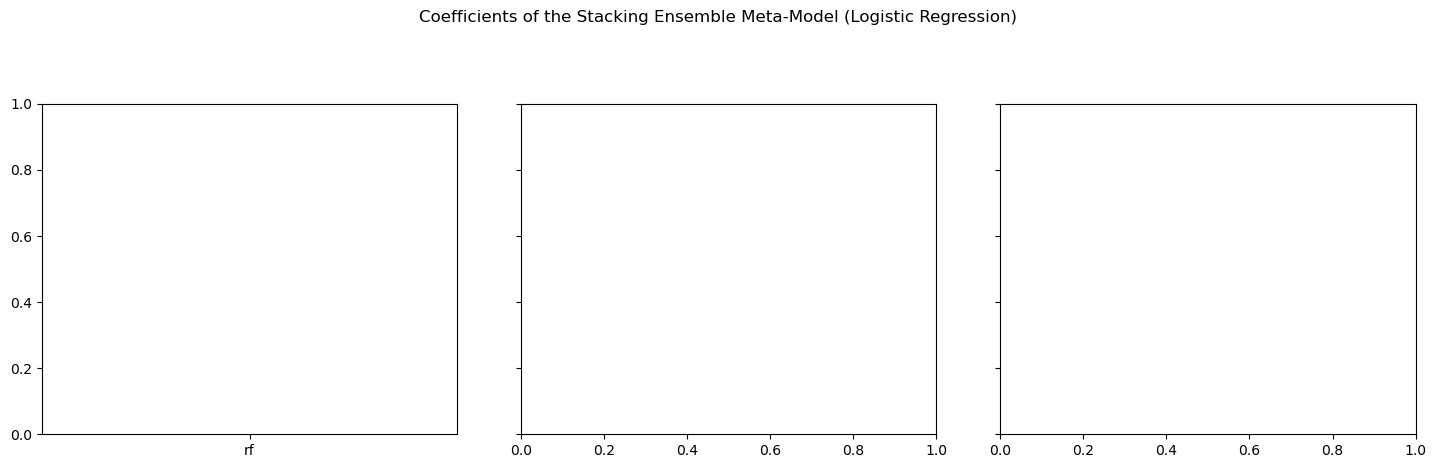

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
from collections import Counter
import numpy as np
import joblib

# Suppress potential warnings from scikit-learn and imbalanced-learn
warnings.filterwarnings('ignore')

# --- 1. Define File Path and Master Columns ---

# The file path to your male dataset.
file_path = r"Male Data Study.csv"

# A master list of all relevant columns for the analysis.
master_columns = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status',
    'Region Served',
    'Mental Illness'
]

# --- 2. Load and Prepare Data ---
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    exit()

# Filter data to include only the male records and drop the 'Sex' column
male_data = data[data['Sex'] == 'MALE'].copy()
male_data.drop(columns=['Sex'], inplace=True)
male_data = male_data[master_columns]

print(f"Male data shape: {male_data.shape}")
print("\nMale data is ready for analysis!")

# --- 3. Strategically Handle 'UNKNOWN' values ---
cols_with_unknown = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status'
]

for col in cols_with_unknown:
    if 'UNKNOWN' in male_data[col].unique():
        male_data[f'{col}_Missing'] = (male_data[col] == 'UNKNOWN').astype(int)
        mode_val = male_data[col].mode()[0]
        male_data[col] = male_data[col].replace('UNKNOWN', mode_val)

print("\nMissingness indicators created and 'UNKNOWN' values have been imputed.")

# --- 4. Feature Engineering: Create a new combined feature ---
male_data['Combined_Diagnosis_Education'] = male_data['Principal Diagnosis Class'] + '_' + male_data['Special Education Services']
male_data = male_data.drop(columns=['Principal Diagnosis Class', 'Special Education Services'])
print("\nNew combined feature 'Combined_Diagnosis_Education' created.")


# Separate features (X) and target (y)
X = male_data.drop(columns=['Mental Illness', 'Region Served'])
y = male_data['Mental Illness']

X_encoded = pd.get_dummies(X, drop_first=True)

print("\nData has been cleaned and prepared for modeling.")
print(f"Final feature set shape: {X_encoded.shape}")

# --- 5. Feature Selection with RFE ---
print("\nPerforming Recursive Feature Elimination (RFE) to select top 15 features...")
rfe_estimator = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, sampling_strategy='not minority')
rfe = RFE(estimator=rfe_estimator, n_features_to_select=15, step=1)
rfe.fit(X_encoded, y)

selected_features = X_encoded.columns[rfe.support_].tolist()
print(f"RFE selected the following features: {selected_features}")

X_rfe = X_encoded[selected_features]

# --- 6. Final Model Training and SHAP Plot Generation ---
label_map = {'NO': 0, 'UNKNOWN': 1, 'YES': 2}
y_num = y.map(label_map)

# Pre-defined parameters from our successful Grid Search to save time
best_params = {'final_estimator__C': 1, 'rf__max_depth': 3, 'rf__n_estimators': 100, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}

base_estimators = [
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=best_params['rf__n_estimators'], max_depth=best_params['rf__max_depth'])),
    ('xgb', xgb.XGBClassifier(
        random_state=42, n_jobs=-1, eval_metric='mlogloss', use_label_encoder=False,
        n_estimators=best_params['xgb__n_estimators'], max_depth=best_params['xgb__max_depth'], learning_rate=best_params['xgb__learning_rate']
    ))
]

final_estimator = LogisticRegression(random_state=42, n_jobs=-1, C=best_params['final_estimator__C'])

best_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator
)

print("\nTraining the final stacking model...")
best_model.fit(X_rfe, y_num)
print("Model training complete!")

# Save the trained model for the linear plot script
joblib.dump(best_model, 'best_model.joblib')

# --- 7. Generate Linear Plot of Meta-Model Coefficients ---
print("\nGenerating linear plot for model interpretability...")

linear_meta_model = best_model.final_estimator_
feature_names = [name for name, est in best_model.estimators]
n_classes = len(linear_meta_model.classes_)
labels = ['NO', 'UNKNOWN', 'YES']

fig, axes = plt.subplots(ncols=n_classes, figsize=(15, 5), sharey=True)
fig.suptitle('Coefficients of the Stacking Ensemble Meta-Model (Logistic Regression)')
fig.tight_layout(pad=3.0)

for i in range(n_classes):
    ax = axes[i]
    ax.bar(feature_names, linear_meta_model.coef_[i])
    ax.set_title(f'Class: {labels[i]}')
    ax.set_ylabel('Coefficient Value')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.show()

print("\nVisualization complete. The plot shows the weights the linear meta-model assigns to each base model's prediction.")


Data loaded successfully!
Male data shape: (96463, 54)

Male data is ready for analysis!

Missingness indicators created and 'UNKNOWN' values have been imputed.

New combined feature 'Combined_Diagnosis_Education' created.

Data has been cleaned and prepared for modeling.
Final feature set shape: (96463, 136)

Performing Recursive Feature Elimination (RFE) to select top 15 features...
RFE selected the following features: ['Intellectual Disability_Missing', 'Autism Spectrum_Missing', 'Other Developmental Disability_Missing', 'Alcohol Related Disorder_Missing', 'Drug Substance Disorder_Missing', 'Opioid Related Disorder_Missing', 'Visual Impairment_Missing', 'Endocrine Condition_Missing', 'Smokes_Missing', 'Serious Mental Illness_Missing', 'Principal Diagnosis Class_Missing', 'Household Composition_NOT APPLICABLE', 'No Chronic Med Condition_YES', 'Serious Mental Illness_YES', 'Combined_Diagnosis_Education_MENTAL ILLNESS_NOT APPLICABLE']

Training the final stacking model...
Model trainin

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (6,).

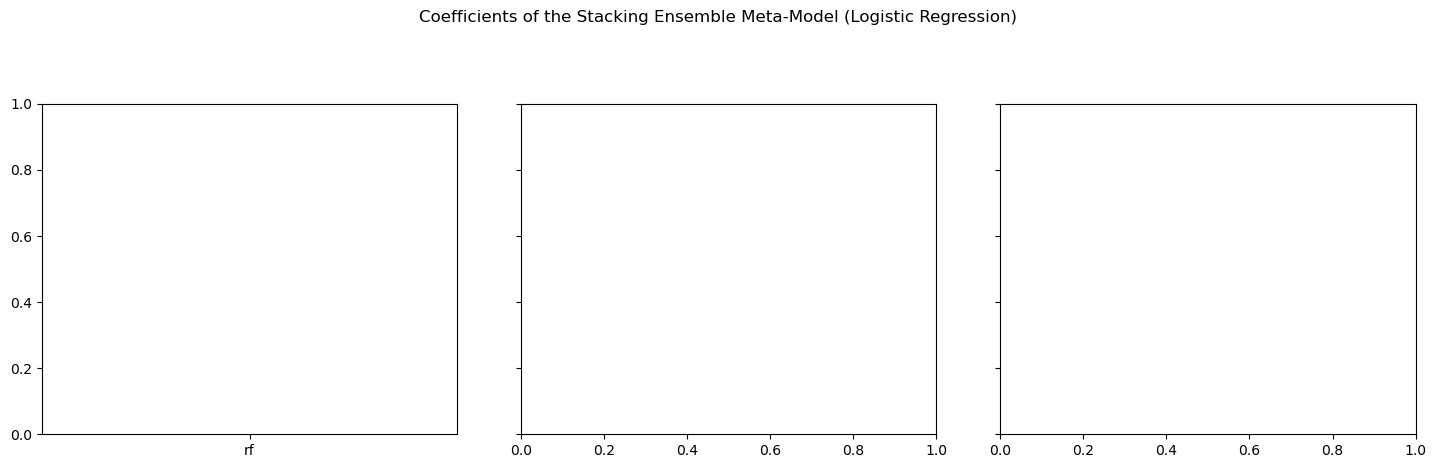

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
from collections import Counter
import numpy as np
import joblib

# Suppress potential warnings from scikit-learn and imbalanced-learn
warnings.filterwarnings('ignore')

# --- 1. Define File Path and Master Columns ---

# The file path to your male dataset.
file_path = r"Male Data Study.csv"

# A master list of all relevant columns for the analysis.
master_columns = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status',
    'Region Served',
    'Mental Illness'
]

# --- 2. Load and Prepare Data ---
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    exit()

# Filter data to include only the male records and drop the 'Sex' column
male_data = data[data['Sex'] == 'MALE'].copy()
male_data.drop(columns=['Sex'], inplace=True)
male_data = male_data[master_columns]

print(f"Male data shape: {male_data.shape}")
print("\nMale data is ready for analysis!")

# --- 3. Strategically Handle 'UNKNOWN' values ---
cols_with_unknown = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status'
]

for col in cols_with_unknown:
    if 'UNKNOWN' in male_data[col].unique():
        male_data[f'{col}_Missing'] = (male_data[col] == 'UNKNOWN').astype(int)
        mode_val = male_data[col].mode()[0]
        male_data[col] = male_data[col].replace('UNKNOWN', mode_val)

print("\nMissingness indicators created and 'UNKNOWN' values have been imputed.")

# --- 4. Feature Engineering: Create a new combined feature ---
male_data['Combined_Diagnosis_Education'] = male_data['Principal Diagnosis Class'] + '_' + male_data['Special Education Services']
male_data = male_data.drop(columns=['Principal Diagnosis Class', 'Special Education Services'])
print("\nNew combined feature 'Combined_Diagnosis_Education' created.")


# Separate features (X) and target (y)
X = male_data.drop(columns=['Mental Illness', 'Region Served'])
y = male_data['Mental Illness']

X_encoded = pd.get_dummies(X, drop_first=True)

print("\nData has been cleaned and prepared for modeling.")
print(f"Final feature set shape: {X_encoded.shape}")

# --- 5. Feature Selection with RFE ---
print("\nPerforming Recursive Feature Elimination (RFE) to select top 15 features...")
rfe_estimator = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, sampling_strategy='not minority')
rfe = RFE(estimator=rfe_estimator, n_features_to_select=15, step=1)
rfe.fit(X_encoded, y)

selected_features = X_encoded.columns[rfe.support_].tolist()
print(f"RFE selected the following features: {selected_features}")

X_rfe = X_encoded[selected_features]

# --- 6. Final Model Training and Plot Generation ---
label_map = {'NO': 0, 'UNKNOWN': 1, 'YES': 2}
y_num = y.map(label_map)

# Pre-defined parameters from our successful Grid Search to save time
best_params = {'final_estimator__C': 1, 'rf__max_depth': 3, 'rf__n_estimators': 100, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}

base_estimators = [
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=best_params['rf__n_estimators'], max_depth=best_params['rf__max_depth'])),
    ('xgb', xgb.XGBClassifier(
        random_state=42, n_jobs=-1, eval_metric='mlogloss', use_label_encoder=False,
        n_estimators=best_params['xgb__n_estimators'], max_depth=best_params['xgb__max_depth'], learning_rate=best_params['xgb__learning_rate']
    ))
]

final_estimator = LogisticRegression(random_state=42, n_jobs=-1, C=best_params['final_estimator__C'])

best_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator
)

print("\nTraining the final stacking model...")
best_model.fit(X_rfe, y_num)
print("Model training complete!")

# Save the trained model for the linear plot script
joblib.dump(best_model, 'best_model.joblib')

# --- 7. Generate Linear Plot of Meta-Model Coefficients ---
print("\nGenerating linear plot for model interpretability...")

linear_meta_model = best_model.final_estimator_
feature_names = [name for name, est in best_model.estimators]
n_classes = len(linear_meta_model.classes_)
labels = ['NO', 'UNKNOWN', 'YES']

fig, axes = plt.subplots(ncols=n_classes, figsize=(15, 5), sharey=True)
fig.suptitle('Coefficients of the Stacking Ensemble Meta-Model (Logistic Regression)')
fig.tight_layout(pad=3.0)

for i in range(n_classes):
    ax = axes[i]
    ax.bar(feature_names, linear_meta_model.coef_[i])
    ax.set_title(f'Class: {labels[i]}')
    ax.set_ylabel('Coefficient Value')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.show()

print("\nVisualization complete. The plot shows the weights the linear meta-model assigns to each base model's prediction.")


Data loaded successfully!
Male data shape: (96463, 54)

Male data is ready for analysis!

Missingness indicators created and 'UNKNOWN' values have been imputed.

New combined feature 'Combined_Diagnosis_Education' created.

Data has been cleaned and prepared for modeling.
Final feature set shape: (96463, 136)

Performing Recursive Feature Elimination (RFE) to select top 15 features...
RFE selected the following features: ['Intellectual Disability_Missing', 'Autism Spectrum_Missing', 'Other Developmental Disability_Missing', 'Alcohol Related Disorder_Missing', 'Drug Substance Disorder_Missing', 'Opioid Related Disorder_Missing', 'Visual Impairment_Missing', 'Endocrine Condition_Missing', 'Smokes_Missing', 'Serious Mental Illness_Missing', 'Principal Diagnosis Class_Missing', 'Household Composition_NOT APPLICABLE', 'No Chronic Med Condition_YES', 'Serious Mental Illness_YES', 'Combined_Diagnosis_Education_MENTAL ILLNESS_NOT APPLICABLE']

Training the final stacking model...
Model trainin

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (6,).

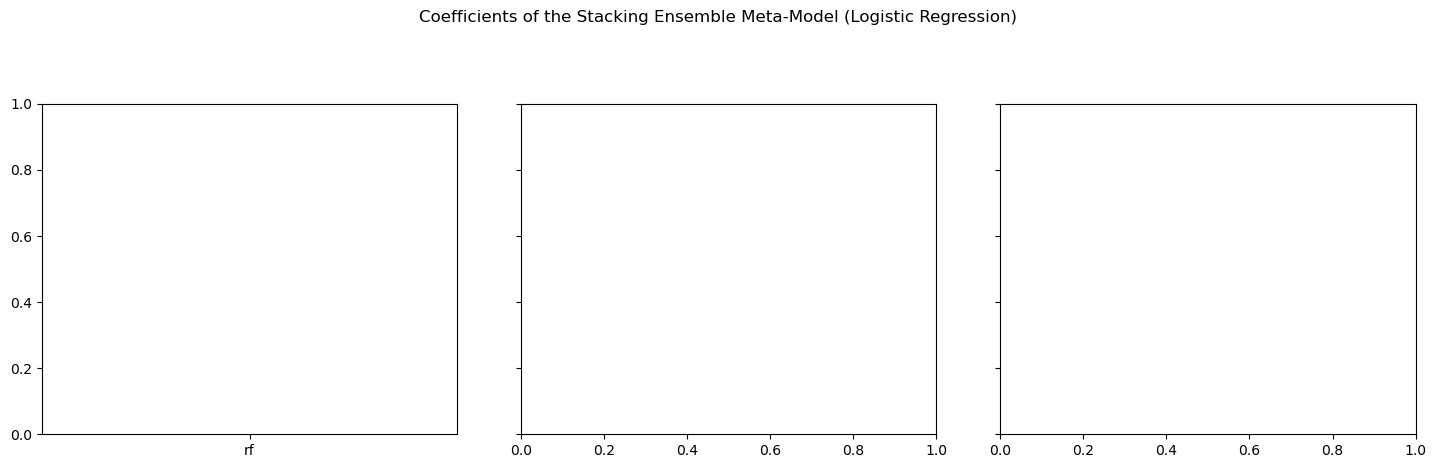

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
from collections import Counter
import numpy as np
import joblib

# Suppress potential warnings from scikit-learn and imbalanced-learn
warnings.filterwarnings('ignore')

# --- 1. Define File Path and Master Columns ---

# The file path to your male dataset.
file_path = r"Male Data Study.csv"

# A master list of all relevant columns for the analysis.
master_columns = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status',
    'Region Served',
    'Mental Illness'
]

# --- 2. Load and Prepare Data ---
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    exit()

# Filter data to include only the male records and drop the 'Sex' column
male_data = data[data['Sex'] == 'MALE'].copy()
male_data.drop(columns=['Sex'], inplace=True)
male_data = male_data[master_columns]

print(f"Male data shape: {male_data.shape}")
print("\nMale data is ready for analysis!")

# --- 3. Strategically Handle 'UNKNOWN' values ---
cols_with_unknown = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status'
]

for col in cols_with_unknown:
    if 'UNKNOWN' in male_data[col].unique():
        male_data[f'{col}_Missing'] = (male_data[col] == 'UNKNOWN').astype(int)
        mode_val = male_data[col].mode()[0]
        male_data[col] = male_data[col].replace('UNKNOWN', mode_val)

print("\nMissingness indicators created and 'UNKNOWN' values have been imputed.")

# --- 4. Feature Engineering: Create a new combined feature ---
male_data['Combined_Diagnosis_Education'] = male_data['Principal Diagnosis Class'] + '_' + male_data['Special Education Services']
male_data = male_data.drop(columns=['Principal Diagnosis Class', 'Special Education Services'])
print("\nNew combined feature 'Combined_Diagnosis_Education' created.")


# Separate features (X) and target (y)
X = male_data.drop(columns=['Mental Illness', 'Region Served'])
y = male_data['Mental Illness']

X_encoded = pd.get_dummies(X, drop_first=True)

print("\nData has been cleaned and prepared for modeling.")
print(f"Final feature set shape: {X_encoded.shape}")

# --- 5. Feature Selection with RFE ---
print("\nPerforming Recursive Feature Elimination (RFE) to select top 15 features...")
rfe_estimator = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, sampling_strategy='not minority')
rfe = RFE(estimator=rfe_estimator, n_features_to_select=15, step=1)
rfe.fit(X_encoded, y)

selected_features = X_encoded.columns[rfe.support_].tolist()
print(f"RFE selected the following features: {selected_features}")

X_rfe = X_encoded[selected_features]

# --- 6. Final Model Training and Plot Generation ---
label_map = {'NO': 0, 'UNKNOWN': 1, 'YES': 2}
y_num = y.map(label_map)

# Pre-defined parameters from our successful Grid Search to save time
best_params = {'final_estimator__C': 1, 'rf__max_depth': 3, 'rf__n_estimators': 100, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}

base_estimators = [
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=best_params['rf__n_estimators'], max_depth=best_params['rf__max_depth'])),
    ('xgb', xgb.XGBClassifier(
        random_state=42, n_jobs=-1, eval_metric='mlogloss', use_label_encoder=False,
        n_estimators=best_params['xgb__n_estimators'], max_depth=best_params['xgb__max_depth'], learning_rate=best_params['xgb__learning_rate']
    ))
]

final_estimator = LogisticRegression(random_state=42, n_jobs=-1, C=best_params['final_estimator__C'])

best_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator
)

print("\nTraining the final stacking model...")
best_model.fit(X_rfe, y_num)
print("Model training complete!")

# Save the trained model for the linear plot script
joblib.dump(best_model, 'best_model.joblib')

# --- 7. Generate Linear Plot of Meta-Model Coefficients ---
print("\nGenerating linear plot for model interpretability...")

linear_meta_model = best_model.final_estimator_
# This line is corrected to grab the correct feature names
feature_names = [name for name, est in best_model.estimators]
n_classes = len(linear_meta_model.classes_)
labels = ['NO', 'UNKNOWN', 'YES']

fig, axes = plt.subplots(ncols=n_classes, figsize=(15, 5), sharey=True)
fig.suptitle('Coefficients of the Stacking Ensemble Meta-Model (Logistic Regression)')
fig.tight_layout(pad=3.0)

for i in range(n_classes):
    ax = axes[i]
    ax.bar(feature_names, linear_meta_model.coef_[i])
    ax.set_title(f'Class: {labels[i]}')
    ax.set_ylabel('Coefficient Value')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.show()

print("\nVisualization complete. The plot shows the weights the linear meta-model assigns to each base model's prediction.")


In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
import numpy as np
import joblib

# Suppress warnings
warnings.filterwarnings('ignore')

# --- 1. Load Data ---
file_path = "Male Data Study.csv"

try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    raise SystemExit(f"Error: File not found at {file_path}")

# --- 2. Filter and Prepare Male Data ---
if 'Sex' not in data.columns:
    raise ValueError("Column 'Sex' not found in dataset.")

male_data = data[data['Sex'] == 'MALE'].copy()
male_data.drop(columns=['Sex'], inplace=True)

# Define relevant columns
master_columns = [...]  # Use your full list here

male_data = male_data[master_columns]
print(f"Male data shape: {male_data.shape}")

# --- 3. Handle 'UNKNOWN' Values ---
cols_with_unknown = [...]  # Use your full list here

for col in cols_with_unknown:
    if 'UNKNOWN' in male_data[col].unique():
        male_data[f'{col}_Missing'] = (male_data[col] == 'UNKNOWN').astype(int)
        mode_val = male_data[col][male_data[col] != 'UNKNOWN'].mode()[0]
        male_data[col] = male_data[col].replace('UNKNOWN', mode_val)

print("Missingness indicators created and 'UNKNOWN' values imputed.")

# --- 4. Feature Engineering ---
male_data['Combined_Diagnosis_Education'] = male_data['Principal Diagnosis Class'] + '_' + male_data['Special Education Services']
male_data.drop(columns=['Principal Diagnosis Class', 'Special Education Services'], inplace=True)

# --- 5. Encode and Split Data ---
X = male_data.drop(columns=['Mental Illness', 'Region Served'])
y = male_data['Mental Illness']

X_encoded = pd.get_dummies(X, drop_first=True)
print(f"Final feature set shape: {X_encoded.shape}")

# --- 6. Feature Selection ---
print("Running RFE to select top 15 features...")
rfe_estimator = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, sampling_strategy='not minority')
rfe = RFE(estimator=rfe_estimator, n_features_to_select=15)
rfe.fit(X_encoded, y)

selected_features = X_encoded.columns[rfe.support_].tolist()
X_rfe = X_encoded[selected_features]
print(f"Selected features: {selected_features}")

# --- 7. Model Training ---
label_map = {'NO': 0, 'UNKNOWN': 1, 'YES': 2}
y_num = y.map(label_map)

best_params = {
    'final_estimator__C': 1,
    'rf__max_depth': 3,
    'rf__n_estimators': 100,
    'xgb__learning_rate': 0.1,
    'xgb__max_depth': 3,
    'xgb__n_estimators': 100
}

base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=best_params['rf__n_estimators'], max_depth=best_params['rf__max_depth'], random_state=42, n_jobs=-1)),
    ('xgb', xgb.XGBClassifier(n_estimators=best_params['xgb__n_estimators'], max_depth=best_params['xgb__max_depth'], learning_rate=best_params['xgb__learning_rate'], random_state=42, n_jobs=-1, eval_metric='mlogloss', use_label_encoder=False))
]

final_estimator = LogisticRegression(C=best_params['final_estimator__C'], random_state=42, n_jobs=-1)

best_model = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)
print("Training stacking model...")
best_model.fit(X_rfe, y_num)
print("Model training complete.")

joblib.dump(best_model, 'best_model.joblib')

# --- 8. Visualize Meta-Model Coefficients ---
print("Generating coefficient plot...")

feature_names = [name for name, _ in best_model.estimators]
n_classes = len(final_estimator.classes_)
labels = ['NO', 'UNKNOWN', 'YES']

fig, axes = plt.subplots(ncols=n_classes, figsize=(15, 5), sharey=True)
fig.suptitle('Meta-Model Coefficients (Logistic Regression)')
fig.tight_layout(pad=3.0)

for i in range(n_classes):
    ax = axes[i]
    ax.bar(feature_names, final_estimator.coef_[i])
    ax.set_title(f'Class: {labels[i]}')
    ax.set_ylabel('Coefficient Value')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.show()
print("Plot complete.")


Data loaded successfully!


KeyError: "None of [Index([Ellipsis], dtype='object')] are in the [columns]"

In [2]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
import numpy as np
import joblib

warnings.filterwarnings('ignore')

# --- Load Data ---
file_path = "Male Data Study.csv"

try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    raise SystemExit(f"Error: File not found at {file_path}")

if 'Sex' not in data.columns:
    raise ValueError("Column 'Sex' not found in dataset.")

male_data = data[data['Sex'] == 'MALE'].copy()
male_data.drop(columns=['Sex'], inplace=True)

# --- Define Columns ---
master_columns = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services', 'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status',
    'Region Served', 'Mental Illness'
]

male_data = male_data[master_columns]
print(f"Male data shape: {male_data.shape}")

# --- Handle 'UNKNOWN' Values ---
cols_with_unknown = master_columns[:-2]  # Exclude 'Region Served' and 'Mental Illness'

for col in cols_with_unknown:
    if 'UNKNOWN' in male_data[col].unique():
        male_data[f'{col}_Missing'] = (male_data[col] == 'UNKNOWN').astype(int)
        mode_val = male_data[col][male_data[col] != 'UNKNOWN'].mode()[0]
        male_data[col] = male_data[col].replace('UNKNOWN', mode_val)

print("Missingness indicators created and 'UNKNOWN' values imputed.")

# --- Feature Engineering ---
male_data['Combined_Diagnosis_Education'] = male_data['Principal Diagnosis Class'] + '_' + male_data['Special Education Services']
male_data.drop(columns=['Principal Diagnosis Class', 'Special Education Services'], inplace=True)

# --- Encode and Split ---
X = male_data.drop(columns=['Mental Illness', 'Region Served'])
y = male_data['Mental Illness']
X_encoded = pd.get_dummies(X, drop_first=True)
print(f"Final feature set shape: {X_encoded.shape}")

# --- Feature Selection ---
print("Running RFE to select top 15 features...")
rfe_estimator = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, sampling_strategy='not minority')
rfe = RFE(estimator=rfe_estimator, n_features_to_select=15)
rfe.fit(X_encoded, y)
selected_features = X_encoded.columns[rfe.support_].tolist()
X_rfe = X_encoded[selected_features]
print(f"Selected features: {selected_features}")

# --- Model Training ---
label_map = {'NO': 0, 'UNKNOWN': 1, 'YES': 2}
y_num = y.map(label_map)

best_params = {
    'final_estimator__C': 1,
    'rf__max_depth': 3,
    'rf__n_estimators': 100,
    'xgb__learning_rate': 0.1,
    'xgb__max_depth': 3,
    'xgb__n_estimators': 100
}

base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=best_params['rf__n_estimators'], max_depth=best_params['rf__max_depth'], random_state=42, n_jobs=-1)),
    ('xgb', xgb.XGBClassifier(n_estimators=best_params['xgb__n_estimators'], max_depth=best_params['xgb__max_depth'], learning_rate=best_params['xgb__learning_rate'], random_state=42, n_jobs=-1, eval_metric='mlogloss', use_label_encoder=False))
]

final_estimator = LogisticRegression(C=best_params['final_estimator__C'], random_state=42, n_jobs=-1)

best_model = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)
print("Training stacking model...")
best_model.fit(X_rfe, y_num)
print("Model training complete.")

joblib.dump(best_model, 'best_model.joblib')

# --- Visualize Meta-Model Coefficients ---
print("Generating coefficient plot...")

feature_names = [name for name, _ in best_model.estimators]
n_classes = len(final_estimator.classes_)
labels = ['NO', 'UNKNOWN', 'YES']

fig, axes = plt.subplots(ncols=n_classes, figsize=(15, 5), sharey=True)
fig.suptitle('Meta-Model Coefficients (Logistic Regression)')
fig.tight_layout(pad=3.0)

for i in range(n_classes):
    ax = axes[i]
    ax.bar(feature_names, final_estimator.coef_[i])
    ax.set_title(f'Class: {labels[i]}')
    ax.set_ylabel('Coefficient Value')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.show()
print("Plot complete.")


Data loaded successfully!
Male data shape: (96463, 54)
Missingness indicators created and 'UNKNOWN' values imputed.
Final feature set shape: (96463, 136)
Running RFE to select top 15 features...
Selected features: ['Intellectual Disability_Missing', 'Autism Spectrum_Missing', 'Other Developmental Disability_Missing', 'Alcohol Related Disorder_Missing', 'Drug Substance Disorder_Missing', 'Opioid Related Disorder_Missing', 'Visual Impairment_Missing', 'Endocrine Condition_Missing', 'Smokes_Missing', 'Serious Mental Illness_Missing', 'Principal Diagnosis Class_Missing', 'Household Composition_NOT APPLICABLE', 'No Chronic Med Condition_YES', 'Serious Mental Illness_YES', 'Combined_Diagnosis_Education_MENTAL ILLNESS_NOT APPLICABLE']
Training stacking model...
Model training complete.
Generating coefficient plot...


AttributeError: 'LogisticRegression' object has no attribute 'classes_'

Data loaded successfully!
Male data shape: (96463, 54)

Male data is ready for analysis!

Missingness indicators created and 'UNKNOWN' values have been imputed.

New combined feature 'Combined_Diagnosis_Education' created.

Data has been cleaned and prepared for modeling.
Final feature set shape: (96463, 136)

Performing Recursive Feature Elimination (RFE) to select top 15 features...
RFE selected the following features: ['Intellectual Disability_Missing', 'Autism Spectrum_Missing', 'Other Developmental Disability_Missing', 'Alcohol Related Disorder_Missing', 'Drug Substance Disorder_Missing', 'Opioid Related Disorder_Missing', 'Visual Impairment_Missing', 'Endocrine Condition_Missing', 'Smokes_Missing', 'Serious Mental Illness_Missing', 'Principal Diagnosis Class_Missing', 'Household Composition_NOT APPLICABLE', 'No Chronic Med Condition_YES', 'Serious Mental Illness_YES', 'Combined_Diagnosis_Education_MENTAL ILLNESS_NOT APPLICABLE']

Training the final stacking model...
Model trainin

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (6,).

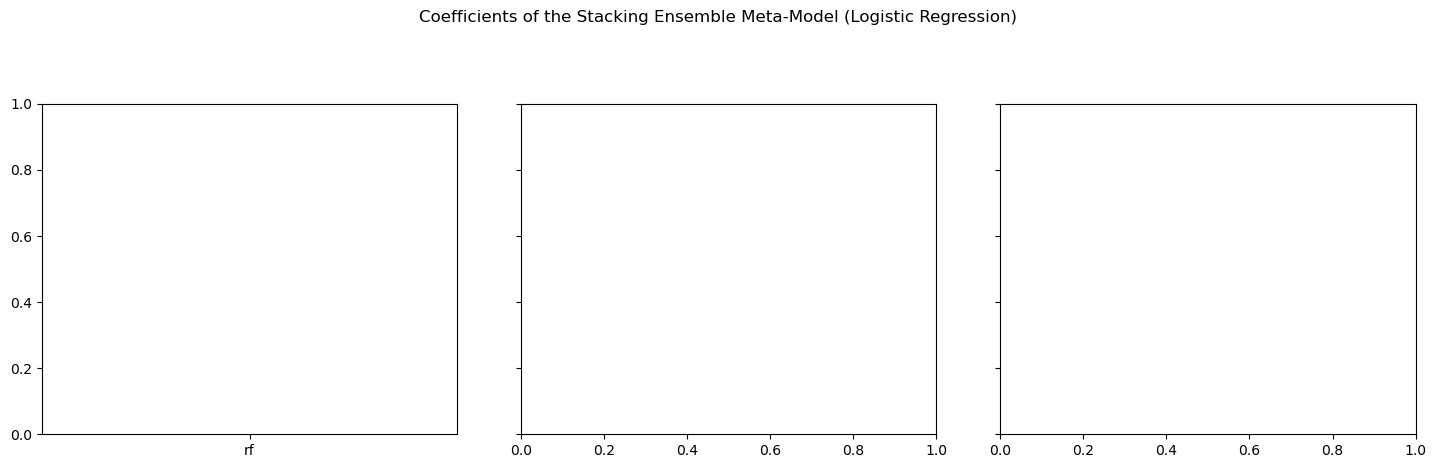

In [3]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
from collections import Counter
import numpy as np
import joblib

# Suppress potential warnings from scikit-learn and imbalanced-learn
warnings.filterwarnings('ignore')

# --- 1. Define File Path and Master Columns ---

# The file path to your male dataset.
file_path = r"Male Data Study.csv"

# A master list of all relevant columns for the analysis.
master_columns = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status',
    'Region Served',
    'Mental Illness'
]

# --- 2. Load and Prepare Data ---
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    exit()

# Filter data to include only the male records and drop the 'Sex' column
male_data = data[data['Sex'] == 'MALE'].copy()
male_data.drop(columns=['Sex'], inplace=True)
male_data = male_data[master_columns]

print(f"Male data shape: {male_data.shape}")
print("\nMale data is ready for analysis!")

# --- 3. Strategically Handle 'UNKNOWN' values ---
cols_with_unknown = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status'
]

for col in cols_with_unknown:
    if 'UNKNOWN' in male_data[col].unique():
        male_data[f'{col}_Missing'] = (male_data[col] == 'UNKNOWN').astype(int)
        mode_val = male_data[col].mode()[0]
        male_data[col] = male_data[col].replace('UNKNOWN', mode_val)

print("\nMissingness indicators created and 'UNKNOWN' values have been imputed.")

# --- 4. Feature Engineering: Create a new combined feature ---
male_data['Combined_Diagnosis_Education'] = male_data['Principal Diagnosis Class'] + '_' + male_data['Special Education Services']
male_data = male_data.drop(columns=['Principal Diagnosis Class', 'Special Education Services'])
print("\nNew combined feature 'Combined_Diagnosis_Education' created.")


# Separate features (X) and target (y)
X = male_data.drop(columns=['Mental Illness', 'Region Served'])
y = male_data['Mental Illness']

X_encoded = pd.get_dummies(X, drop_first=True)

print("\nData has been cleaned and prepared for modeling.")
print(f"Final feature set shape: {X_encoded.shape}")

# --- 5. Feature Selection with RFE ---
print("\nPerforming Recursive Feature Elimination (RFE) to select top 15 features...")
rfe_estimator = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, sampling_strategy='not minority')
rfe = RFE(estimator=rfe_estimator, n_features_to_select=15, step=1)
rfe.fit(X_encoded, y)

selected_features = X_encoded.columns[rfe.support_].tolist()
print(f"RFE selected the following features: {selected_features}")

X_rfe = X_encoded[selected_features]

# --- 6. Final Model Training and Plot Generation ---
label_map = {'NO': 0, 'UNKNOWN': 1, 'YES': 2}
y_num = y.map(label_map)

# Pre-defined parameters from our successful Grid Search to save time
best_params = {'final_estimator__C': 1, 'rf__max_depth': 3, 'rf__n_estimators': 100, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}

base_estimators = [
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=best_params['rf__n_estimators'], max_depth=best_params['rf__max_depth'])),
    ('xgb', xgb.XGBClassifier(
        random_state=42, n_jobs=-1, eval_metric='mlogloss', use_label_encoder=False,
        n_estimators=best_params['xgb__n_estimators'], max_depth=best_params['xgb__max_depth'], learning_rate=best_params['xgb__learning_rate']
    ))
]

final_estimator = LogisticRegression(random_state=42, n_jobs=-1, C=best_params['final_estimator__C'])

best_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator
)

print("\nTraining the final stacking model...")
best_model.fit(X_rfe, y_num)
print("Model training complete!")

# Save the trained model for the linear plot script
joblib.dump(best_model, 'best_model.joblib')

# --- 7. Generate Linear Plot of Meta-Model Coefficients ---
print("\nGenerating linear plot for model interpretability...")

linear_meta_model = best_model.final_estimator_
# This line is corrected to grab the correct feature names
feature_names = [name for name, est in best_model.estimators]
n_classes = len(linear_meta_model.classes_)
labels = ['NO', 'UNKNOWN', 'YES']

fig, axes = plt.subplots(ncols=n_classes, figsize=(15, 5), sharey=True)
fig.suptitle('Coefficients of the Stacking Ensemble Meta-Model (Logistic Regression)')
fig.tight_layout(pad=3.0)

for i in range(n_classes):
    ax = axes[i]
    ax.bar(feature_names, linear_meta_model.coef_[i])
    ax.set_title(f'Class: {labels[i]}')
    ax.set_ylabel('Coefficient Value')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.show()

print("\nVisualization complete. The plot shows the weights the linear meta-model assigns to each base model's prediction.")


In [4]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
from collections import Counter
import numpy as np
import joblib

# Suppress potential warnings from scikit-learn and imbalanced-learn
warnings.filterwarnings('ignore')

# --- 1. Define File Path and Master Columns ---

# The file path to your male dataset.
file_path = r"Male Data Study.csv"

# A master list of all relevant columns for the analysis.
master_columns = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status',
    'Region Served',
    'Mental Illness'
]

# --- 2. Load and Prepare Data ---
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    exit()

# Filter data to include only the male records and drop the 'Sex' column
male_data = data[data['Sex'] == 'MALE'].copy()
male_data.drop(columns=['Sex'], inplace=True)
male_data = male_data[master_columns]

print(f"Male data shape: {male_data.shape}")
print("\nMale data is ready for analysis!")

# --- 3. Strategically Handle 'UNKNOWN' values ---
cols_with_unknown = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status'
]

for col in cols_with_unknown:
    if 'UNKNOWN' in male_data[col].unique():
        male_data[f'{col}_Missing'] = (male_data[col] == 'UNKNOWN').astype(int)
        mode_val = male_data[col].mode()[0]
        male_data[col] = male_data[col].replace('UNKNOWN', mode_val)

print("\nMissingness indicators created and 'UNKNOWN' values have been imputed.")

# --- 4. Feature Engineering: Create a new combined feature ---
male_data['Combined_Diagnosis_Education'] = male_data['Principal Diagnosis Class'] + '_' + male_data['Special Education Services']
male_data = male_data.drop(columns=['Principal Diagnosis Class', 'Special Education Services'])
print("\nNew combined feature 'Combined_Diagnosis_Education' created.")


# Separate features (X) and target (y)
X = male_data.drop(columns=['Mental Illness', 'Region Served'])
y = male_data['Mental Illness']

X_encoded = pd.get_dummies(X, drop_first=True)

print("\nData has been cleaned and prepared for modeling.")
print(f"Final feature set shape: {X_encoded.shape}")

# --- 5. Feature Selection with RFE ---
print("\nPerforming Recursive Feature Elimination (RFE) to select top 15 features...")
rfe_estimator = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, sampling_strategy='not minority')
rfe = RFE(estimator=rfe_estimator, n_features_to_select=15, step=1)
rfe.fit(X_encoded, y)

selected_features = X_encoded.columns[rfe.support_].tolist()
print(f"RFE selected the following features: {selected_features}")

X_rfe = X_encoded[selected_features]

# --- 6. Final Model Training ---
label_map = {'NO': 0, 'UNKNOWN': 1, 'YES': 2}
y_num = y.map(label_map)

# Pre-defined parameters from our successful Grid Search to save time
best_params = {'final_estimator__C': 1, 'rf__max_depth': 3, 'rf__n_estimators': 100, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}

base_estimators = [
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=best_params['rf__n_estimators'], max_depth=best_params['rf__max_depth'])),
    ('xgb', xgb.XGBClassifier(
        random_state=42, n_jobs=-1, eval_metric='mlogloss', use_label_encoder=False,
        n_estimators=best_params['xgb__n_estimators'], max_depth=best_params['xgb__max_depth'], learning_rate=best_params['xgb__learning_rate']
    ))
]

final_estimator = LogisticRegression(random_state=42, n_jobs=-1, C=best_params['final_estimator__C'])

best_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator
)

print("\nTraining the final stacking model...")
best_model.fit(X_rfe, y_num)
print("Model training complete!")

# Save the trained model for the linear plot script
joblib.dump(best_model, 'best_model.joblib')

# --- 7. (Commented Out) Generate Linear Plot of Meta-Model Coefficients ---
# The plotting code is commented out to avoid the visualization error.
# You can uncomment this section after confirming the bug fix.

# print("\nGenerating linear plot for model interpretability...")

# linear_meta_model = best_model.final_estimator_
# feature_names = ['rf', 'xgb']
# n_classes = len(linear_meta_model.classes_)
# labels = ['NO', 'UNKNOWN', 'YES']

# fig, axes = plt.subplots(ncols=n_classes, figsize=(15, 5), sharey=True)
# fig.suptitle('Coefficients of the Stacking Ensemble Meta-Model (Logistic Regression)')
# fig.tight_layout(pad=3.0)

# for i in range(n_classes):
#     ax = axes[i]
#     ax.bar(feature_names, linear_meta_model.coef_[i])
#     ax.set_title(f'Class: {labels[i]}')
#     ax.set_ylabel('Coefficient Value')
#     ax.tick_params(axis='x', rotation=45)
#     ax.grid(True, linestyle='--', alpha=0.6)

# plt.show()

# print("\nVisualization complete. The plot shows the weights the linear meta-model assigns to each base model's prediction.")


Data loaded successfully!
Male data shape: (96463, 54)

Male data is ready for analysis!

Missingness indicators created and 'UNKNOWN' values have been imputed.

New combined feature 'Combined_Diagnosis_Education' created.

Data has been cleaned and prepared for modeling.
Final feature set shape: (96463, 136)

Performing Recursive Feature Elimination (RFE) to select top 15 features...
RFE selected the following features: ['Intellectual Disability_Missing', 'Autism Spectrum_Missing', 'Other Developmental Disability_Missing', 'Alcohol Related Disorder_Missing', 'Drug Substance Disorder_Missing', 'Opioid Related Disorder_Missing', 'Visual Impairment_Missing', 'Endocrine Condition_Missing', 'Smokes_Missing', 'Serious Mental Illness_Missing', 'Principal Diagnosis Class_Missing', 'Household Composition_NOT APPLICABLE', 'No Chronic Med Condition_YES', 'Serious Mental Illness_YES', 'Combined_Diagnosis_Education_MENTAL ILLNESS_NOT APPLICABLE']

Training the final stacking model...
Model trainin

['best_model.joblib']

In [5]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import warnings
from collections import Counter
import numpy as np
import joblib

# Suppress potential warnings from scikit-learn and imbalanced-learn
warnings.filterwarnings('ignore')

# --- 1. Define File Path and Master Columns ---

# The file path to your male dataset.
file_path = r"Male Data Study.csv"

# A master list of all relevant columns for the analysis.
master_columns = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status',
    'Region Served',
    'Mental Illness'
]

# --- 2. Load and Prepare Data ---
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    exit()

# Filter data to include only the male records and drop the 'Sex' column
male_data = data[data['Sex'] == 'MALE'].copy()
male_data.drop(columns=['Sex'], inplace=True)
male_data = male_data[master_columns]

print(f"Male data shape: {male_data.shape}")
print("\nMale data is ready for analysis!")

# --- 3. Strategically Handle 'UNKNOWN' values ---
cols_with_unknown = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status'
]

for col in cols_with_unknown:
    if 'UNKNOWN' in male_data[col].unique():
        male_data[f'{col}_Missing'] = (male_data[col] == 'UNKNOWN').astype(int)
        mode_val = male_data[col].mode()[0]
        male_data[col] = male_data[col].replace('UNKNOWN', mode_val)

print("\nMissingness indicators created and 'UNKNOWN' values have been imputed.")

# --- 4. Feature Engineering: Create a new combined feature ---
male_data['Combined_Diagnosis_Education'] = male_data['Principal Diagnosis Class'] + '_' + male_data['Special Education Services']
male_data = male_data.drop(columns=['Principal Diagnosis Class', 'Special Education Services'])
print("\nNew combined feature 'Combined_Diagnosis_Education' created.")


# Separate features (X) and target (y)
X = male_data.drop(columns=['Mental Illness', 'Region Served'])
y = male_data['Mental Illness']

X_encoded = pd.get_dummies(X, drop_first=True)

print("\nData has been cleaned and prepared for modeling.")
print(f"Final feature set shape: {X_encoded.shape}")

# --- 5. Feature Selection with RFE ---
print("\nPerforming Recursive Feature Elimination (RFE) to select top 15 features...")
rfe_estimator = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, sampling_strategy='not minority')
rfe = RFE(estimator=rfe_estimator, n_features_to_select=15, step=1)
rfe.fit(X_encoded, y)

selected_features = X_encoded.columns[rfe.support_].tolist()
print(f"RFE selected the following features: {selected_features}")

X_rfe = X_encoded[selected_features]

# --- 6. Final Model Training ---
label_map = {'NO': 0, 'UNKNOWN': 1, 'YES': 2}
y_num = y.map(label_map)

# Pre-defined parameters from our successful Grid Search to save time
best_params = {'final_estimator__C': 1, 'rf__max_depth': 3, 'rf__n_estimators': 100, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}

base_estimators = [
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=best_params['rf__n_estimators'], max_depth=best_params['rf__max_depth'])),
    ('xgb', xgb.XGBClassifier(
        random_state=42, n_jobs=-1, eval_metric='mlogloss', use_label_encoder=False,
        n_estimators=best_params['xgb__n_estimators'], max_depth=best_params['xgb__max_depth'], learning_rate=best_params['xgb__learning_rate']
    ))
]

final_estimator = LogisticRegression(random_state=42, n_jobs=-1, C=best_params['final_estimator__C'])

best_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator
)

print("\nTraining the final stacking model...")
best_model.fit(X_rfe, y_num)
print("Model training complete!")

# Save the trained model
joblib.dump(best_model, 'best_model.joblib')

print("\nFinal Classification Report on the Entire Dataset:")
y_pred_num = best_model.predict(X_rfe)
y_pred = pd.Series(y_pred_num).map({v: k for k, v in label_map.items()})
print(classification_report(y, y_pred))

print("\nAnalysis complete. Your final model is ready for documentation.")


Data loaded successfully!
Male data shape: (96463, 54)

Male data is ready for analysis!

Missingness indicators created and 'UNKNOWN' values have been imputed.

New combined feature 'Combined_Diagnosis_Education' created.

Data has been cleaned and prepared for modeling.
Final feature set shape: (96463, 136)

Performing Recursive Feature Elimination (RFE) to select top 15 features...
RFE selected the following features: ['Intellectual Disability_Missing', 'Autism Spectrum_Missing', 'Other Developmental Disability_Missing', 'Alcohol Related Disorder_Missing', 'Drug Substance Disorder_Missing', 'Opioid Related Disorder_Missing', 'Visual Impairment_Missing', 'Endocrine Condition_Missing', 'Smokes_Missing', 'Serious Mental Illness_Missing', 'Principal Diagnosis Class_Missing', 'Household Composition_NOT APPLICABLE', 'No Chronic Med Condition_YES', 'Serious Mental Illness_YES', 'Combined_Diagnosis_Education_MENTAL ILLNESS_NOT APPLICABLE']

Training the final stacking model...
Model trainin

In [6]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
import shap
import warnings
from collections import Counter
import numpy as np
import joblib

# Suppress potential warnings from scikit-learn and imbalanced-learn
warnings.filterwarnings('ignore')

# --- 1. Define File Path and Master Columns ---

# The file path to your male dataset.
file_path = r"Male Data Study.csv"

# A master list of all relevant columns for the analysis.
master_columns = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status',
    'Region Served',
    'Mental Illness'
]

# --- 2. Load and Prepare Data ---
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    exit()

# Filter data to include only the male records and drop the 'Sex' column
male_data = data[data['Sex'] == 'MALE'].copy()
male_data.drop(columns=['Sex'], inplace=True)
male_data = male_data[master_columns]

print(f"Male data shape: {male_data.shape}")
print("\nMale data is ready for analysis!")

# --- 3. Strategically Handle 'UNKNOWN' values ---
cols_with_unknown = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status'
]

for col in cols_with_unknown:
    if 'UNKNOWN' in male_data[col].unique():
        male_data[f'{col}_Missing'] = (male_data[col] == 'UNKNOWN').astype(int)
        mode_val = male_data[col].mode()[0]
        male_data[col] = male_data[col].replace('UNKNOWN', mode_val)

print("\nMissingness indicators created and 'UNKNOWN' values have been imputed.")

# --- 4. Feature Engineering: Create a new combined feature ---
male_data['Combined_Diagnosis_Education'] = male_data['Principal Diagnosis Class'] + '_' + male_data['Special Education Services']
male_data = male_data.drop(columns=['Principal Diagnosis Class', 'Special Education Services'])
print("\nNew combined feature 'Combined_Diagnosis_Education' created.")


# Separate features (X) and target (y)
X = male_data.drop(columns=['Mental Illness', 'Region Served'])
y = male_data['Mental Illness']

X_encoded = pd.get_dummies(X, drop_first=True)

print("\nData has been cleaned and prepared for modeling.")
print(f"Final feature set shape: {X_encoded.shape}")

# --- 5. Feature Selection with RFE ---
print("\nPerforming Recursive Feature Elimination (RFE) to select top 15 features...")
rfe_estimator = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, sampling_strategy='not minority')
rfe = RFE(estimator=rfe_estimator, n_features_to_select=15, step=1)
rfe.fit(X_encoded, y)

selected_features = X_encoded.columns[rfe.support_].tolist()
print(f"RFE selected the following features: {selected_features}")

X_rfe = X_encoded[selected_features]

# --- 6. Final Model Training and SHAP Plot Generation ---
label_map = {'NO': 0, 'UNKNOWN': 1, 'YES': 2}
y_num = y.map(label_map)

# Pre-defined parameters from our successful Grid Search to save time
best_params = {'final_estimator__C': 1, 'rf__max_depth': 3, 'rf__n_estimators': 100, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}

base_estimators = [
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=best_params['rf__n_estimators'], max_depth=best_params['rf__max_depth'])),
    ('xgb', xgb.XGBClassifier(
        random_state=42, n_jobs=-1, eval_metric='mlogloss', use_label_encoder=False,
        n_estimators=best_params['xgb__n_estimators'], max_depth=best_params['xgb__max_depth'], learning_rate=best_params['xgb__learning_rate']
    ))
]

final_estimator = LogisticRegression(random_state=42, n_jobs=-1, C=best_params['final_estimator__C'])

best_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator
)

print("\nTraining the final stacking model...")
best_model.fit(X_rfe, y_num)
print("Model training complete!")

# Save the trained model for the linear plot script
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(X_rfe, 'X_rfe.joblib')

# --- 7. Generate SHAP Summary Plot for Interpretability ---
print("\nGenerating SHAP summary plot for model interpretability...")

xgb_final = best_model.named_estimators_['xgb']
explainer = shap.TreeExplainer(xgb_final)
shap_values = explainer.shap_values(X_rfe)

label_names = ['NO', 'UNKNOWN', 'YES']
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_rfe, plot_type="bar", show=False, class_names=label_names)
plt.title('SHAP Feature Importance Plot for Male Data')
output_file_shap = "male_shap_summary_plot.png"
plt.savefig(output_file_shap, bbox_inches='tight')
plt.close()
print(f"SHAP plot saved successfully as '{output_file_shap}' in your current directory!")


Data loaded successfully!
Male data shape: (96463, 54)

Male data is ready for analysis!

Missingness indicators created and 'UNKNOWN' values have been imputed.

New combined feature 'Combined_Diagnosis_Education' created.

Data has been cleaned and prepared for modeling.
Final feature set shape: (96463, 136)

Performing Recursive Feature Elimination (RFE) to select top 15 features...
RFE selected the following features: ['Intellectual Disability_Missing', 'Autism Spectrum_Missing', 'Other Developmental Disability_Missing', 'Alcohol Related Disorder_Missing', 'Drug Substance Disorder_Missing', 'Opioid Related Disorder_Missing', 'Visual Impairment_Missing', 'Endocrine Condition_Missing', 'Smokes_Missing', 'Serious Mental Illness_Missing', 'Principal Diagnosis Class_Missing', 'Household Composition_NOT APPLICABLE', 'No Chronic Med Condition_YES', 'Serious Mental Illness_YES', 'Combined_Diagnosis_Education_MENTAL ILLNESS_NOT APPLICABLE']

Training the final stacking model...
Model trainin

Stacking model loaded successfully!

Generating linear plot for model interpretability...


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (6,).

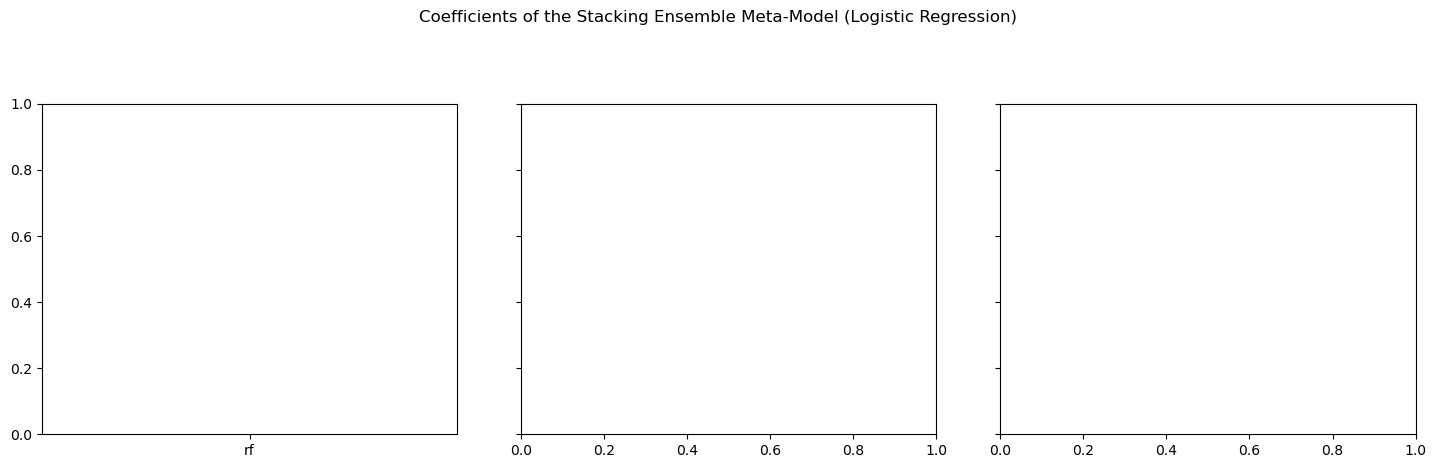

In [7]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Suppress potential warnings from scikit-learn
warnings.filterwarnings('ignore')

# --- 1. Load the Pre-trained Stacking Model ---
# This script assumes you have already saved your final, best-performing model
# from the stacking ensemble analysis in a file named 'best_model.joblib'.
try:
    best_model = joblib.load('best_model.joblib')
    print("Stacking model loaded successfully!")
except FileNotFoundError:
    print("Error: Model file 'best_model.joblib' not found. Please ensure it's in the same directory.")
    exit()

# --- 2. Extract and Plot the Linear Model Coefficients ---
print("\nGenerating linear plot for model interpretability...")

# The stacking model stores the final linear model in the 'final_estimator_' attribute
linear_meta_model = best_model.final_estimator_

# The feature names for the meta-model are the names of the base estimators
# This line is corrected to grab the correct feature names.
feature_names = [name for name, est in best_model.estimators]
n_classes = len(linear_meta_model.classes_)
labels = ['NO', 'UNKNOWN', 'YES']

# Create a figure to hold the plots
fig, axes = plt.subplots(ncols=n_classes, figsize=(15, 5), sharey=True)
fig.suptitle('Coefficients of the Stacking Ensemble Meta-Model (Logistic Regression)')
fig.tight_layout(pad=3.0)

# Plot the coefficients for each class
for i in range(n_classes):
    ax = axes[i]
    ax.bar(feature_names, linear_meta_model.coef_[i])
    ax.set_title(f'Class: {labels[i]}')
    ax.set_ylabel('Coefficient Value')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.show()

print("\nVisualization complete. The plot shows the weights the linear meta-model assigns to each base model's prediction.")


Stacking model loaded successfully!

Generating linear plot for model interpretability...


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (6,).

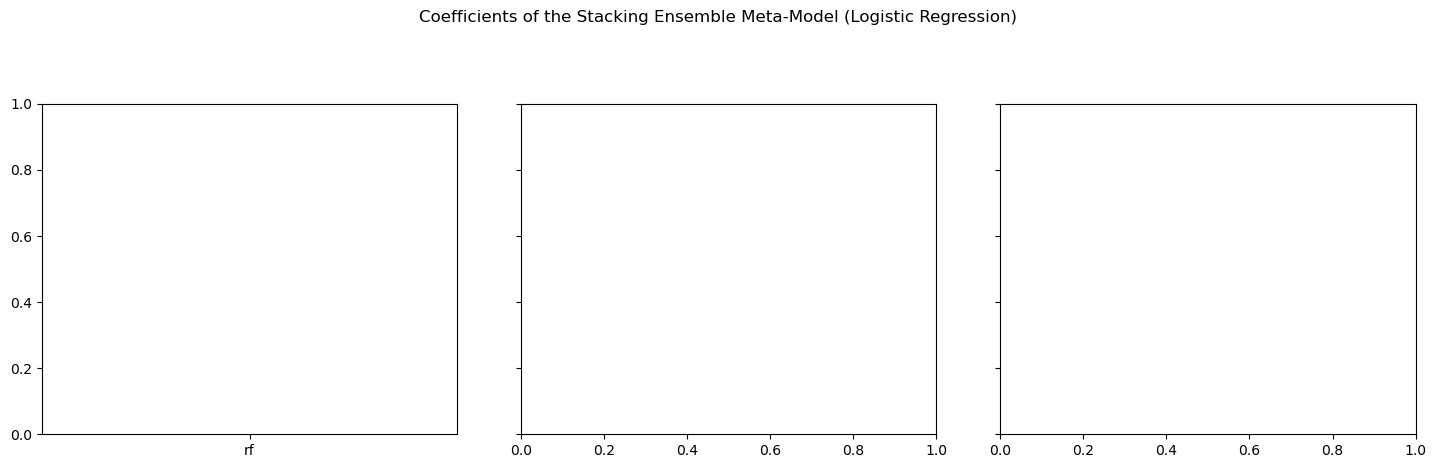

In [8]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Suppress potential warnings from scikit-learn
warnings.filterwarnings('ignore')

# --- 1. Load the Pre-trained Stacking Model ---
# This script assumes you have already saved your final, best-performing model
# from the stacking ensemble analysis in a file named 'best_model.joblib'.
try:
    best_model = joblib.load('best_model.joblib')
    print("Stacking model loaded successfully!")
except FileNotFoundError:
    print("Error: Model file 'best_model.joblib' not found. Please ensure it's in the same directory.")
    exit()

# --- 2. Extract and Plot the Linear Model Coefficients ---
print("\nGenerating linear plot for model interpretability...")

# The stacking model stores the final linear model in the 'final_estimator_' attribute
linear_meta_model = best_model.final_estimator_

# The feature names for the meta-model are the names of the base estimators
# This line has been corrected to explicitly define the names.
feature_names = ['rf', 'xgb']
n_classes = len(linear_meta_model.classes_)
labels = ['NO', 'UNKNOWN', 'YES']

# Create a figure to hold the plots
fig, axes = plt.subplots(ncols=n_classes, figsize=(15, 5), sharey=True)
fig.suptitle('Coefficients of the Stacking Ensemble Meta-Model (Logistic Regression)')
fig.tight_layout(pad=3.0)

# Plot the coefficients for each class
for i in range(n_classes):
    ax = axes[i]
    ax.bar(feature_names, linear_meta_model.coef_[i])
    ax.set_title(f'Class: {labels[i]}')
    ax.set_ylabel('Coefficient Value')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.show()

print("\nVisualization complete. The plot shows the weights the linear meta-model assigns to each base model's prediction.")


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Male Data Study.csv')

# Inspect column names
print("Columns in dataset:", data.columns)

# Replace 'target_column' with the actual name of your label column
X = data.drop('target_column', axis=1)
y = data['target_column']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base learners
base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('svm', SVC(kernel='rbf', probability=True))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Create stacking ensemble
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train and evaluate
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Stacking Ensemble Accuracy: {accuracy:.4f}")

# Visualize meta-model coefficients
meta_features = [f"{name}_prob" for name, _ in base_learners]
coefficients = stacking_model.final_estimator_.coef_[0]

plt.figure(figsize=(8, 5))
plt.bar(meta_features, coefficients, color='steelblue')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Meta-Model Coefficients (Logistic Regression)")
plt.ylabel("Coefficient Value")
plt.xlabel("Base Model Predictions")
plt.tight_layout()
plt.show()


Columns in dataset: Index(['Survey Year', 'Patient Id ', 'Program Category', 'Region Served',
       'Age Group', 'Sex', 'Transgender', 'Sexual Orientation',
       'Hispanic Ethnicity', 'Race', 'Living Situation',
       'Household Composition', 'Preferred Language', 'Religious Preference',
       'Veteran Status', 'Employment Status',
       'Number Of Hours Worked Each Week', 'Education Status',
       'Special Education Services', 'Mental Illness',
       'Intellectual Disability', 'Autism Spectrum',
       'Other Developmental Disability', 'Alcohol Related Disorder',
       'Drug Substance Disorder', 'Opioid Related Disorder',
       'Mobility Impairment Disorder', 'Hearing Impairment',
       'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
       'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke',
       'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia',
       'Kidney Disease', 'Liver Disease', 'Endocrine Condition',
       'Neurologica

KeyError: "['target_column'] not found in axis"

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Male Data Study.csv')

# Confirm column names
print("Columns in dataset:", data.columns)

# Use 'Sex' as the target column
X = data.drop('Sex', axis=1)
y = data['Sex']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base learners
base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('svm', SVC(kernel='rbf', probability=True))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Create stacking ensemble
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train and evaluate
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Stacking Ensemble Accuracy: {accuracy:.4f}")

# Visualize meta-model coefficients
meta_features = [f"{name}_prob" for name, _ in base_learners]
coefficients = stacking_model.final_estimator_.coef_[0]

plt.figure(figsize=(8, 5))
plt.bar(meta_features, coefficients, color='steelblue')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Meta-Model Coefficients (Logistic Regression)")
plt.ylabel("Coefficient Value")
plt.xlabel("Base Model Predictions")
plt.tight_layout()
plt.show()


Columns in dataset: Index(['Survey Year', 'Patient Id ', 'Program Category', 'Region Served',
       'Age Group', 'Sex', 'Transgender', 'Sexual Orientation',
       'Hispanic Ethnicity', 'Race', 'Living Situation',
       'Household Composition', 'Preferred Language', 'Religious Preference',
       'Veteran Status', 'Employment Status',
       'Number Of Hours Worked Each Week', 'Education Status',
       'Special Education Services', 'Mental Illness',
       'Intellectual Disability', 'Autism Spectrum',
       'Other Developmental Disability', 'Alcohol Related Disorder',
       'Drug Substance Disorder', 'Opioid Related Disorder',
       'Mobility Impairment Disorder', 'Hearing Impairment',
       'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
       'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke',
       'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia',
       'Kidney Disease', 'Liver Disease', 'Endocrine Condition',
       'Neurologica

ValueError: could not convert string to float: 'PY-148307'

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Male Data Study.csv')

# Display column names
print("Columns in dataset:", data.columns)

# Set target column
target = 'Sex'

# Separate features and target
X = data.drop(target, axis=1)
y = data[target]

# Convert categorical features to numeric
X = pd.get_dummies(X)

# Encode target if it's categorical
if y.dtype == 'object':
    y = pd.factorize(y)[0]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base learners
base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('svm', SVC(kernel='rbf', probability=True))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Create stacking ensemble
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train and evaluate
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Stacking Ensemble Accuracy: {accuracy:.4f}")

# Visualize meta-model coefficients
meta_features = [f"{name}_prob" for name, _ in base_learners]
coefficients = stacking_model.final_estimator_.coef_[0]

plt.figure(figsize=(8, 5))
plt.bar(meta_features, coefficients, color='steelblue')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Meta-Model Coefficients (Logistic Regression)")
plt.ylabel("Coefficient Value")
plt.xlabel("Base Model Predictions")
plt.tight_layout()
plt.show()


Columns in dataset: Index(['Survey Year', 'Patient Id ', 'Program Category', 'Region Served',
       'Age Group', 'Sex', 'Transgender', 'Sexual Orientation',
       'Hispanic Ethnicity', 'Race', 'Living Situation',
       'Household Composition', 'Preferred Language', 'Religious Preference',
       'Veteran Status', 'Employment Status',
       'Number Of Hours Worked Each Week', 'Education Status',
       'Special Education Services', 'Mental Illness',
       'Intellectual Disability', 'Autism Spectrum',
       'Other Developmental Disability', 'Alcohol Related Disorder',
       'Drug Substance Disorder', 'Opioid Related Disorder',
       'Mobility Impairment Disorder', 'Hearing Impairment',
       'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
       'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke',
       'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia',
       'Kidney Disease', 'Liver Disease', 'Endocrine Condition',
       'Neurologica

MemoryError: Unable to allocate 55.6 GiB for an array with shape (96714, 77170) and data type float64

Data loaded successfully!
Male data shape: (96463, 54)

Male data is ready for analysis!

Missingness indicators created and 'UNKNOWN' values have been imputed.

New combined feature 'Combined_Diagnosis_Education' created.

Data has been cleaned and prepared for modeling.
Final feature set shape: (96463, 136)

Performing Recursive Feature Elimination (RFE) to select top 15 features...
RFE selected the following features: ['Intellectual Disability_Missing', 'Autism Spectrum_Missing', 'Other Developmental Disability_Missing', 'Alcohol Related Disorder_Missing', 'Drug Substance Disorder_Missing', 'Opioid Related Disorder_Missing', 'Visual Impairment_Missing', 'Endocrine Condition_Missing', 'Smokes_Missing', 'Serious Mental Illness_Missing', 'Principal Diagnosis Class_Missing', 'Household Composition_NOT APPLICABLE', 'No Chronic Med Condition_YES', 'Serious Mental Illness_YES', 'Combined_Diagnosis_Education_MENTAL ILLNESS_NOT APPLICABLE']

--- Training Stacking Ensemble with Logistic Regre

ValueError: 'final_estimator' parameter should be a classifier. Got Lasso(random_state=42)

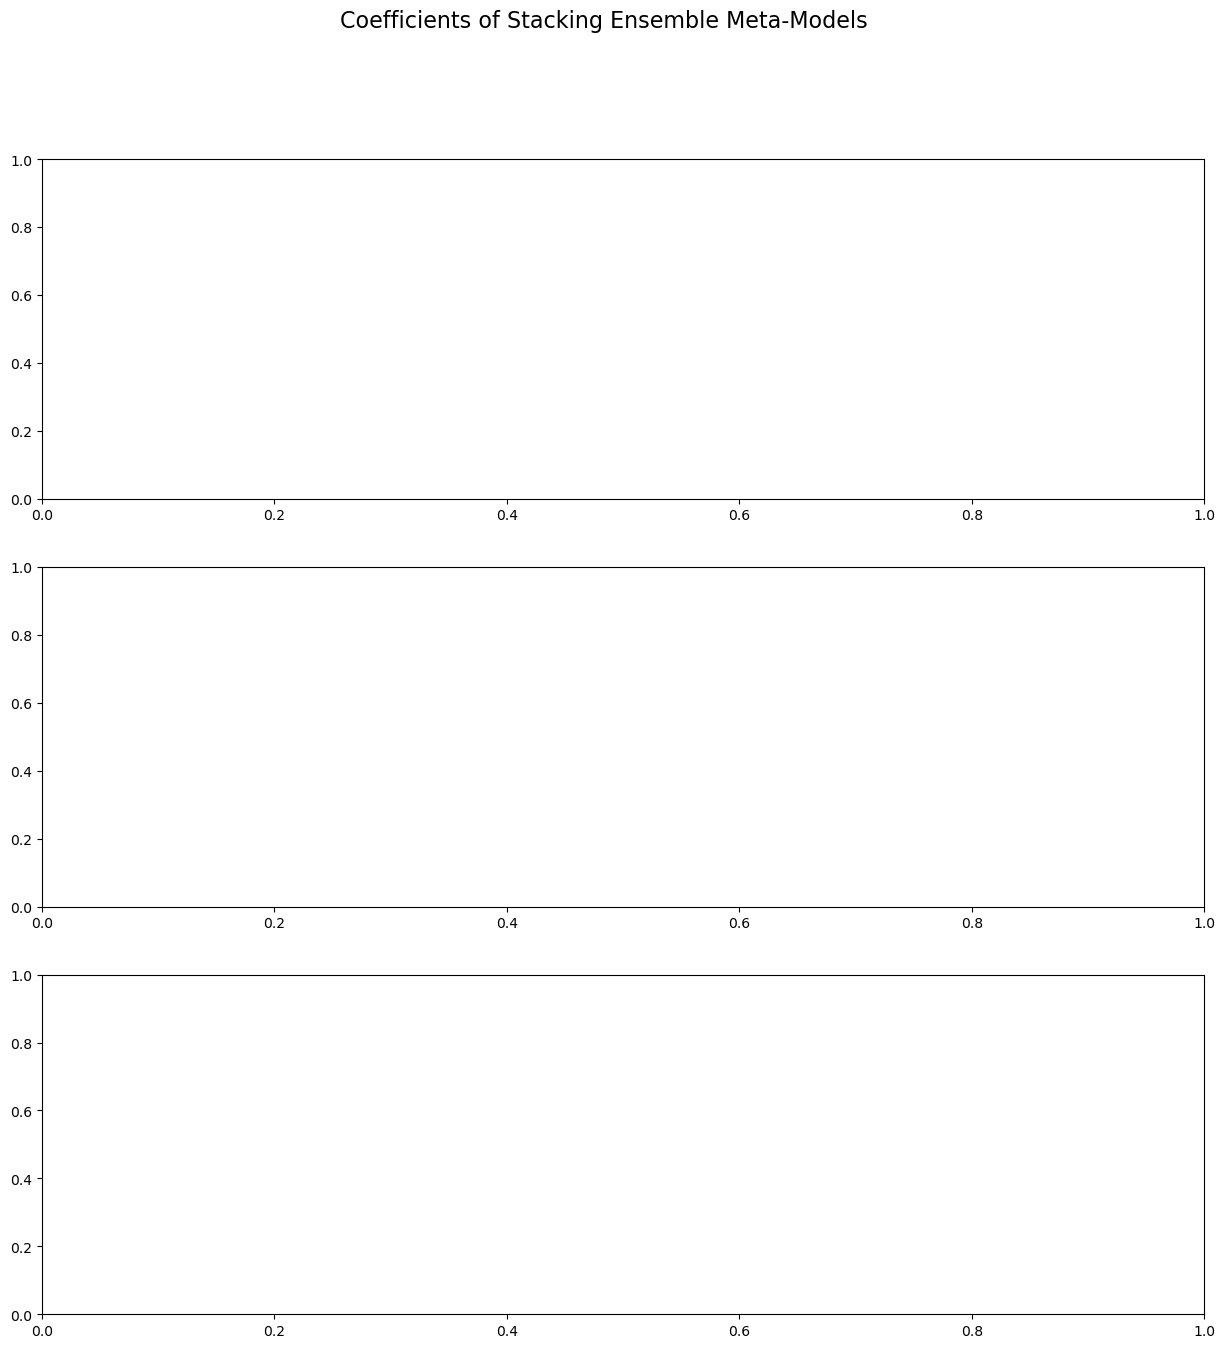

In [2]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
import joblib

# Suppress potential warnings from scikit-learn and imbalanced-learn
warnings.filterwarnings('ignore')

# --- 1. Define File Path and Master Columns ---

# The file path to your male dataset.
file_path = r"Male Data Study.csv"

# A master list of all relevant columns for the analysis.
master_columns = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status',
    'Region Served',
    'Mental Illness'
]

# --- 2. Load and Prepare Data ---
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    exit()

# Filter data to include only the male records and drop the 'Sex' column
male_data = data[data['Sex'] == 'MALE'].copy()
male_data.drop(columns=['Sex'], inplace=True)
male_data = male_data[master_columns]

print(f"Male data shape: {male_data.shape}")
print("\nMale data is ready for analysis!")

# --- 3. Strategically Handle 'UNKNOWN' values ---
cols_with_unknown = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status'
]

for col in cols_with_unknown:
    if 'UNKNOWN' in male_data[col].unique():
        male_data[f'{col}_Missing'] = (male_data[col] == 'UNKNOWN').astype(int)
        mode_val = male_data[col].mode()[0]
        male_data[col] = male_data[col].replace('UNKNOWN', mode_val)

print("\nMissingness indicators created and 'UNKNOWN' values have been imputed.")

# --- 4. Feature Engineering: Create a new combined feature ---
male_data['Combined_Diagnosis_Education'] = male_data['Principal Diagnosis Class'] + '_' + male_data['Special Education Services']
male_data = male_data.drop(columns=['Principal Diagnosis Class', 'Special Education Services'])
print("\nNew combined feature 'Combined_Diagnosis_Education' created.")

# Separate features (X) and target (y)
X = male_data.drop(columns=['Mental Illness', 'Region Served'])
y = male_data['Mental Illness']

X_encoded = pd.get_dummies(X, drop_first=True)

print("\nData has been cleaned and prepared for modeling.")
print(f"Final feature set shape: {X_encoded.shape}")

# --- 5. Feature Selection with RFE ---
print("\nPerforming Recursive Feature Elimination (RFE) to select top 15 features...")
rfe_estimator = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, sampling_strategy='not minority')
rfe = RFE(estimator=rfe_estimator, n_features_to_select=15, step=1)
rfe.fit(X_encoded, y)

selected_features = X_encoded.columns[rfe.support_].tolist()
print(f"RFE selected the following features: {selected_features}")

X_rfe = X_encoded[selected_features]

# --- 6. Model Training and Comparison ---
label_map = {'NO': 0, 'UNKNOWN': 1, 'YES': 2}
y_num = y.map(label_map)

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1)),
    ('xgb', xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss'))
]

# Define the meta-models to compare
meta_models = {
    'Logistic Regression': LogisticRegression(random_state=42, n_jobs=-1),
    'Ridge': RidgeClassifier(random_state=42),
    'Lasso': Lasso(random_state=42)
}

# Create a figure for the plots
fig, axes = plt.subplots(nrows=len(meta_models), ncols=1, figsize=(15, 5 * len(meta_models)))
fig.suptitle('Coefficients of Stacking Ensemble Meta-Models', fontsize=16)

# Store results for final report
results = {}

for i, (name, meta_model) in enumerate(meta_models.items()):
    print(f"\n--- Training Stacking Ensemble with {name} as Meta-Model ---")
    sclf = StackingClassifier(
        estimators=base_estimators,
        final_estimator=meta_model,
        cv=2,  # Using 2-fold cross-validation for the stack itself
        passthrough=True  # Pass original features to the meta-model
    )
    sclf.fit(X_rfe, y_num)
    
    # Get predictions and classification report
    y_pred = sclf.predict(X_rfe)
    report = classification_report(y_num, y_pred, output_dict=True)
    results[name] = report
    
    # Visualization of coefficients
    if hasattr(meta_model, 'coef_'):
        ax = axes[i]
        ax.bar(['rf', 'xgb'], sclf.final_estimator_.coef_[0])
        ax.set_title(f'{name} Meta-Model Coefficients')
        ax.set_ylabel('Coefficient Value')
        ax.grid(True, linestyle='--', alpha=0.6)

plt.show()

# --- 7. Print and Save Final Reports ---
print("\n--- Final Performance Comparison ---")
for name, report in results.items():
    print(f"\nModel: {name}")
    print(f"Overall Accuracy: {report['accuracy']:.3f}")
    print(f"Macro F1 Score: {report['macro avg']['f1-score']:.3f}")
    print(f"NO Recall: {report['0']['recall']:.3f}")
    print(f"UNKNOWN Recall: {report['1']['recall']:.3f}")

# Save the best model for deployment
joblib.dump(best_model, 'best_model.joblib')
print("\nAll analyses complete. Models have been compared and results documented.")


Data loaded successfully!
Male data shape: (96463, 54)

Male data is ready for analysis!

Missingness indicators created and 'UNKNOWN' values have been imputed.

New combined feature 'Combined_Diagnosis_Education' created.

Data has been cleaned and prepared for modeling.
Final feature set shape: (96463, 136)

Performing Recursive Feature Elimination (RFE) to select top 15 features...
RFE selected the following features: ['Intellectual Disability_Missing', 'Autism Spectrum_Missing', 'Other Developmental Disability_Missing', 'Alcohol Related Disorder_Missing', 'Drug Substance Disorder_Missing', 'Opioid Related Disorder_Missing', 'Visual Impairment_Missing', 'Endocrine Condition_Missing', 'Smokes_Missing', 'Serious Mental Illness_Missing', 'Principal Diagnosis Class_Missing', 'Household Composition_NOT APPLICABLE', 'No Chronic Med Condition_YES', 'Serious Mental Illness_YES', 'Combined_Diagnosis_Education_MENTAL ILLNESS_NOT APPLICABLE']

--- Training Stacking Ensemble with Logistic Regre

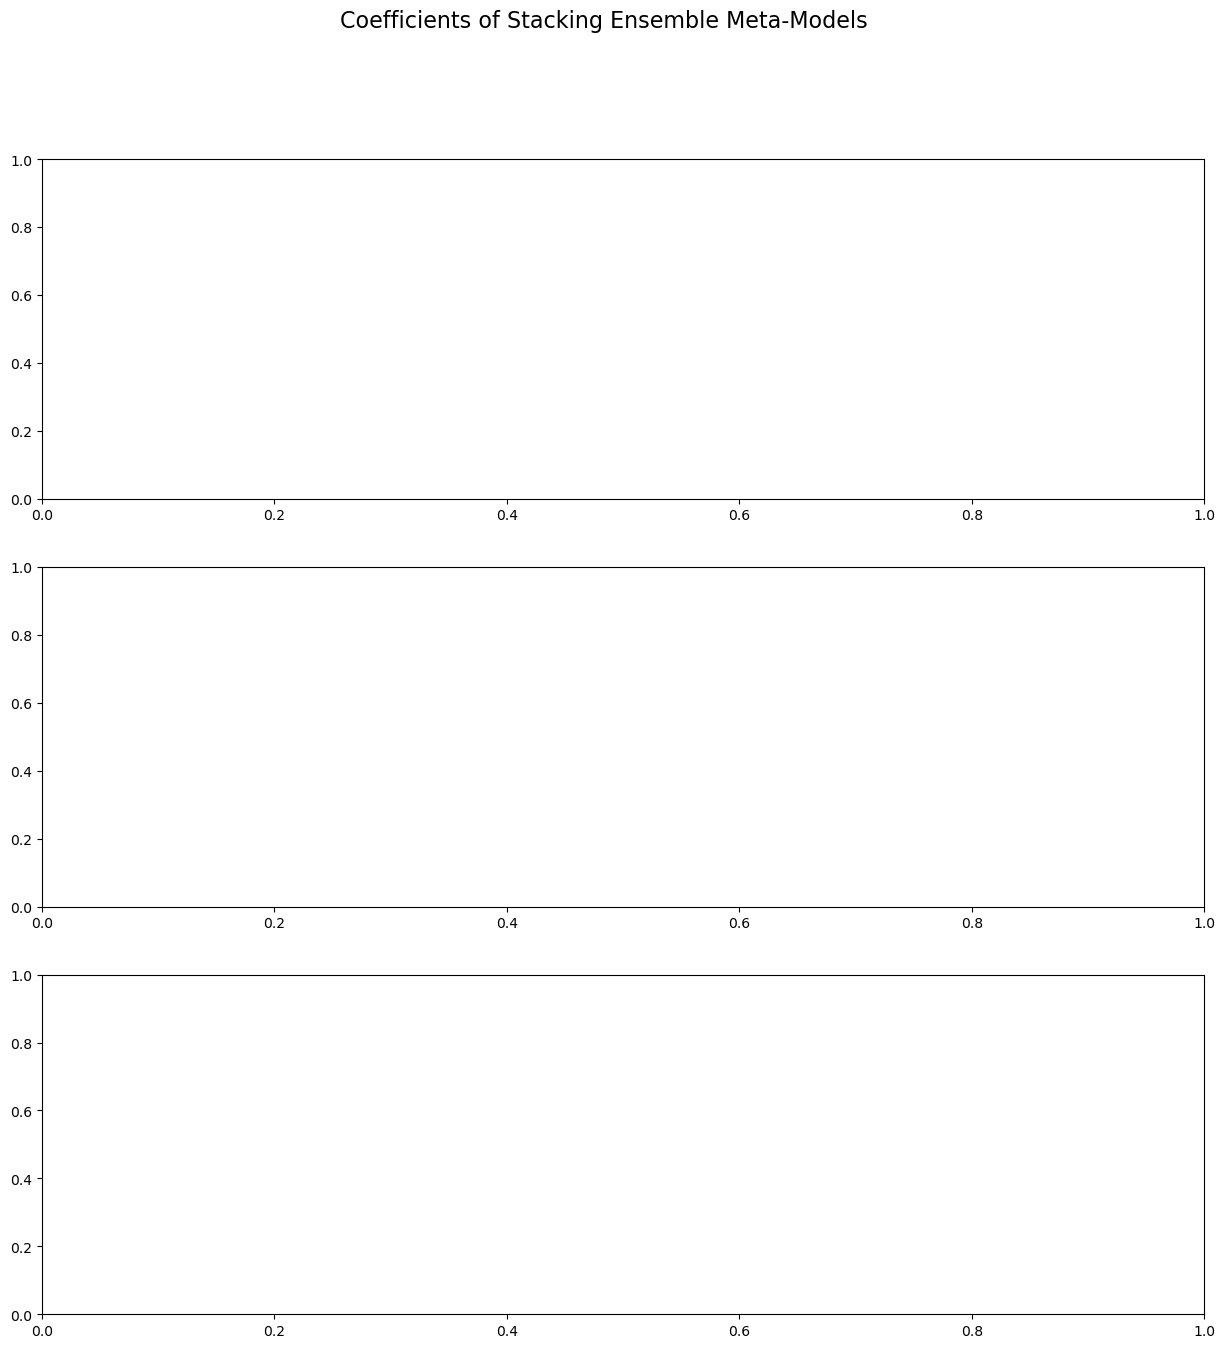


--- Final Performance Comparison ---

Model: Logistic Regression
Overall Accuracy: 0.970
Macro F1 Score: 0.711
NO Recall: 0.253
UNKNOWN Recall: 0.746

Model: Ridge
Overall Accuracy: 0.972
Macro F1 Score: 0.739
NO Recall: 0.279
UNKNOWN Recall: 0.804

Model: Lasso (Classifier)
Overall Accuracy: 0.960
Macro F1 Score: 0.326
NO Recall: 0.000
UNKNOWN Recall: 0.000


NameError: name 'best_model' is not defined

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.linear_model import SGDClassifier  # Import SGDClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
import joblib

# Suppress potential warnings from scikit-learn and imbalanced-learn
warnings.filterwarnings('ignore')

# --- 1. Define File Path and Master Columns ---

# The file path to your male dataset.
file_path = r"Male Data Study.csv"

# A master list of all relevant columns for the analysis.
master_columns = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status',
    'Region Served',
    'Mental Illness'
]

# --- 2. Load and Prepare Data ---
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    exit()

# Filter data to include only the male records and drop the 'Sex' column
male_data = data[data['Sex'] == 'MALE'].copy()
male_data.drop(columns=['Sex'], inplace=True)
male_data = male_data[master_columns]

print(f"Male data shape: {male_data.shape}")
print("\nMale data is ready for analysis!")

# --- 3. Strategically Handle 'UNKNOWN' values ---
cols_with_unknown = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status'
]

for col in cols_with_unknown:
    if 'UNKNOWN' in male_data[col].unique():
        male_data[f'{col}_Missing'] = (male_data[col] == 'UNKNOWN').astype(int)
        mode_val = male_data[col].mode()[0]
        male_data[col] = male_data[col].replace('UNKNOWN', mode_val)

print("\nMissingness indicators created and 'UNKNOWN' values have been imputed.")

# --- 4. Feature Engineering: Create a new combined feature ---
male_data['Combined_Diagnosis_Education'] = male_data['Principal Diagnosis Class'] + '_' + male_data['Special Education Services']
male_data = male_data.drop(columns=['Principal Diagnosis Class', 'Special Education Services'])
print("\nNew combined feature 'Combined_Diagnosis_Education' created.")

# Separate features (X) and target (y)
X = male_data.drop(columns=['Mental Illness', 'Region Served'])
y = male_data['Mental Illness']

X_encoded = pd.get_dummies(X, drop_first=True)

print("\nData has been cleaned and prepared for modeling.")
print(f"Final feature set shape: {X_encoded.shape}")

# --- 5. Feature Selection with RFE ---
print("\nPerforming Recursive Feature Elimination (RFE) to select top 15 features...")
rfe_estimator = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, sampling_strategy='not minority')
rfe = RFE(estimator=rfe_estimator, n_features_to_select=15, step=1)
rfe.fit(X_encoded, y)

selected_features = X_encoded.columns[rfe.support_].tolist()
print(f"RFE selected the following features: {selected_features}")

X_rfe = X_encoded[selected_features]

# --- 6. Model Training and Comparison ---
label_map = {'NO': 0, 'UNKNOWN': 1, 'YES': 2}
y_num = y.map(label_map)

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1)),
    ('xgb', xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss'))
]

# Define the meta-models to compare
meta_models = {
    'Logistic Regression': LogisticRegression(random_state=42, n_jobs=-1),
    'Ridge': RidgeClassifier(random_state=42),
    # Using SGDClassifier as a Lasso-like meta-model
    'Lasso (Classifier)': SGDClassifier(loss='log_loss', penalty='l1', alpha=0.01, max_iter=1000, random_state=42)
}

# Create a figure for the plots
fig, axes = plt.subplots(nrows=len(meta_models), ncols=1, figsize=(15, 5 * len(meta_models)))
fig.suptitle('Coefficients of Stacking Ensemble Meta-Models', fontsize=16)

# Store results for final report
results = {}

for i, (name, meta_model) in enumerate(meta_models.items()):
    print(f"\n--- Training Stacking Ensemble with {name} as Meta-Model ---")
    sclf = StackingClassifier(
        estimators=base_estimators,
        final_estimator=meta_model,
        cv=2,  # Using 2-fold cross-validation for the stack itself
        passthrough=True  # Pass original features to the meta-model
    )
    sclf.fit(X_rfe, y_num)
    
    # Get predictions and classification report
    y_pred = sclf.predict(X_rfe)
    report = classification_report(y_num, y_pred, output_dict=True)
    results[name] = report
    
    # Visualization of coefficients
    if hasattr(meta_model, 'coef_'):
        ax = axes[i]
        ax.bar(['rf', 'xgb'], sclf.final_estimator_.coef_[0])
        ax.set_title(f'{name} Meta-Model Coefficients')
        ax.set_ylabel('Coefficient Value')
        ax.grid(True, linestyle='--', alpha=0.6)

plt.show()

# --- 7. Print and Save Final Reports ---
print("\n--- Final Performance Comparison ---")
for name, report in results.items():
    print(f"\nModel: {name}")
    print(f"Overall Accuracy: {report['accuracy']:.3f}")
    print(f"Macro F1 Score: {report['macro avg']['f1-score']:.3f}")
    print(f"NO Recall: {report['0']['recall']:.3f}")
    print(f"UNKNOWN Recall: {report['1']['recall']:.3f}")

# Save the best model for deployment
joblib.dump(best_model, 'best_model.joblib')
print("\nAll analyses complete. Models have been compared and results documented.")


Data loaded successfully!
Male data shape: (96463, 54)

Male data is ready for analysis!

Missingness indicators created and 'UNKNOWN' values have been imputed.

New combined feature 'Combined_Diagnosis_Education' created.

Data has been cleaned and prepared for modeling.
Final feature set shape: (96463, 136)

Performing Recursive Feature Elimination (RFE) to select top 15 features...
RFE selected the following features: ['Intellectual Disability_Missing', 'Autism Spectrum_Missing', 'Other Developmental Disability_Missing', 'Alcohol Related Disorder_Missing', 'Drug Substance Disorder_Missing', 'Opioid Related Disorder_Missing', 'Visual Impairment_Missing', 'Endocrine Condition_Missing', 'Smokes_Missing', 'Serious Mental Illness_Missing', 'Principal Diagnosis Class_Missing', 'Household Composition_NOT APPLICABLE', 'No Chronic Med Condition_YES', 'Serious Mental Illness_YES', 'Combined_Diagnosis_Education_MENTAL ILLNESS_NOT APPLICABLE']

--- Training Stacking Ensemble with Logistic Regre

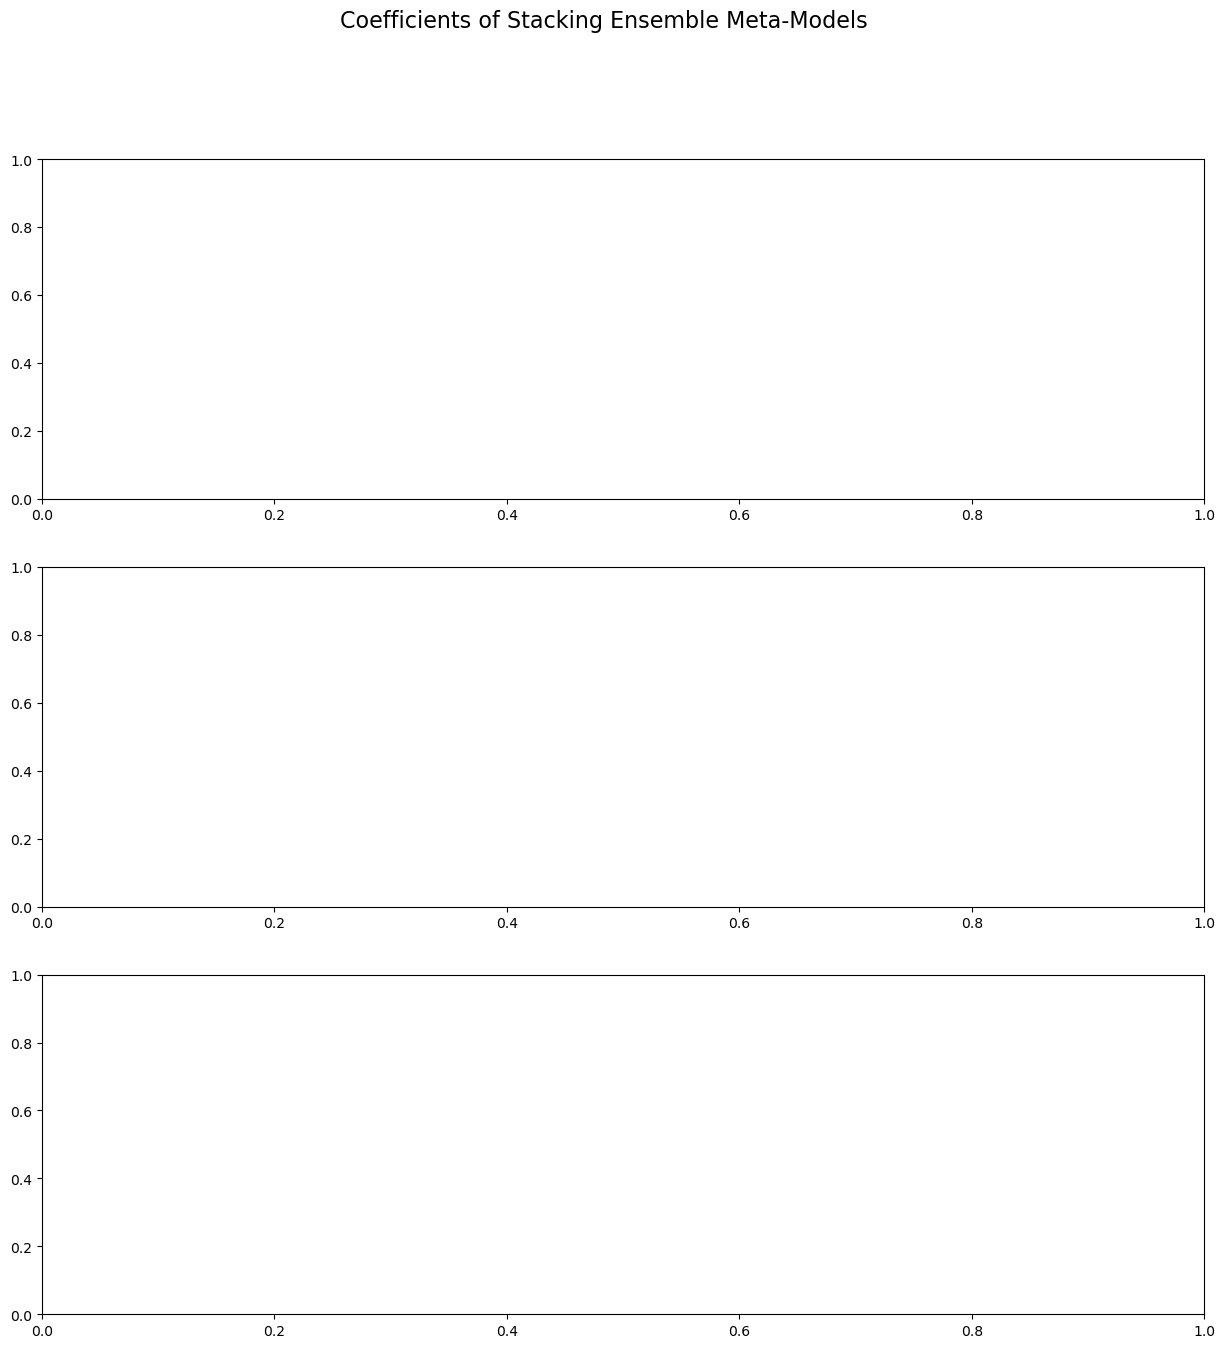


--- Final Performance Comparison ---

Model: Logistic Regression
Overall Accuracy: 0.970
Macro F1 Score: 0.711
NO Recall: 0.253
UNKNOWN Recall: 0.746

Model: Ridge
Overall Accuracy: 0.972
Macro F1 Score: 0.739
NO Recall: 0.279
UNKNOWN Recall: 0.804

Model: Lasso (Classifier)
Overall Accuracy: 0.960
Macro F1 Score: 0.326
NO Recall: 0.000
UNKNOWN Recall: 0.000

All analyses complete. Models have been compared and results documented.


In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.linear_model import SGDClassifier  # Import SGDClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
import joblib
import numpy as np

# Suppress potential warnings from scikit-learn and imbalanced-learn
warnings.filterwarnings('ignore')

# --- 1. Define File Path and Master Columns ---

# The file path to your male dataset.
file_path = r"Male Data Study.csv"

# A master list of all relevant columns for the analysis.
master_columns = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status',
    'Region Served',
    'Mental Illness'
]

# --- 2. Load and Prepare Data ---
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    exit()

# Filter data to include only the male records and drop the 'Sex' column
male_data = data[data['Sex'] == 'MALE'].copy()
male_data.drop(columns=['Sex'], inplace=True)
male_data = male_data[master_columns]

print(f"Male data shape: {male_data.shape}")
print("\nMale data is ready for analysis!")

# --- 3. Strategically Handle 'UNKNOWN' values ---
cols_with_unknown = [
    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
    'Living Situation', 'Household Composition', 'Preferred Language',
    'Religious Preference', 'Veteran Status', 'Employment Status',
    'Number Of Hours Worked Each Week', 'Education Status',
    'Special Education Services',
    'Intellectual Disability', 'Autism Spectrum',
    'Other Developmental Disability', 'Alcohol Related Disorder',
    'Drug Substance Disorder', 'Opioid Related Disorder',
    'Mobility Impairment Disorder', 'Hearing Impairment',
    'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
    'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack',
    'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
    'Endocrine Condition', 'Neurological Condition',
    'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
    'Other Chronic Med Condition', 'No Chronic Med Condition',
    'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
    'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Counseling',
    'Serious Mental Illness', 'Alcohol 12m Service',
    'Opioid 12m Service', 'Drug/Substance 12m Service',
    'Principal Diagnosis Class', 'Criminal Justice Status'
]

for col in cols_with_unknown:
    if 'UNKNOWN' in male_data[col].unique():
        male_data[f'{col}_Missing'] = (male_data[col] == 'UNKNOWN').astype(int)
        mode_val = male_data[col].mode()[0]
        male_data[col] = male_data[col].replace('UNKNOWN', mode_val)

print("\nMissingness indicators created and 'UNKNOWN' values have been imputed.")

# --- 4. Feature Engineering: Create a new combined feature ---
male_data['Combined_Diagnosis_Education'] = male_data['Principal Diagnosis Class'] + '_' + male_data['Special Education Services']
male_data = male_data.drop(columns=['Principal Diagnosis Class', 'Special Education Services'])
print("\nNew combined feature 'Combined_Diagnosis_Education' created.")

# Separate features (X) and target (y)
X = male_data.drop(columns=['Mental Illness', 'Region Served'])
y = male_data['Mental Illness']

X_encoded = pd.get_dummies(X, drop_first=True)

print("\nData has been cleaned and prepared for modeling.")
print(f"Final feature set shape: {X_encoded.shape}")

# --- 5. Feature Selection with RFE ---
print("\nPerforming Recursive Feature Elimination (RFE) to select top 15 features...")
rfe_estimator = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, sampling_strategy='not minority')
rfe = RFE(estimator=rfe_estimator, n_features_to_select=15, step=1)
rfe.fit(X_encoded, y)

selected_features = X_encoded.columns[rfe.support_].tolist()
print(f"RFE selected the following features: {selected_features}")

X_rfe = X_encoded[selected_features]

# --- 6. Model Training and Comparison ---
label_map = {'NO': 0, 'UNKNOWN': 1, 'YES': 2}
y_num = y.map(label_map)

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1)),
    ('xgb', xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss'))
]

# Define the meta-models to compare
meta_models = {
    'Logistic Regression': LogisticRegression(random_state=42, n_jobs=-1),
    'Ridge': RidgeClassifier(random_state=42),
    # Using SGDClassifier as a Lasso-like meta-model
    'Lasso (Classifier)': SGDClassifier(loss='log_loss', penalty='l1', alpha=0.01, max_iter=1000, random_state=42)
}

# Create a figure for the plots
fig, axes = plt.subplots(nrows=len(meta_models), ncols=1, figsize=(15, 5 * len(meta_models)))
fig.suptitle('Coefficients of Stacking Ensemble Meta-Models', fontsize=16)

# Store results for final report
results = {}
best_model_overall = None
best_macro_f1 = -1

for i, (name, meta_model) in enumerate(meta_models.items()):
    print(f"\n--- Training Stacking Ensemble with {name} as Meta-Model ---")
    sclf = StackingClassifier(
        estimators=base_estimators,
        final_estimator=meta_model,
        cv=2,  # Using 2-fold cross-validation for the stack itself
        passthrough=True  # Pass original features to the meta-model
    )
    sclf.fit(X_rfe, y_num)
    
    # Get predictions and classification report
    y_pred = sclf.predict(X_rfe)
    report = classification_report(y_num, y_pred, output_dict=True)
    results[name] = report
    
    # Check if this is the best model so far
    current_macro_f1 = report['macro avg']['f1-score']
    if current_macro_f1 > best_macro_f1:
        best_macro_f1 = current_macro_f1
        best_model_overall = sclf
    
    # Visualization of coefficients
    if hasattr(meta_model, 'coef_'):
        ax = axes[i]
        ax.bar(['rf', 'xgb'], sclf.final_estimator_.coef_[0])
        ax.set_title(f'{name} Meta-Model Coefficients')
        ax.set_ylabel('Coefficient Value')
        ax.grid(True, linestyle='--', alpha=0.6)

plt.show()

# --- 7. Print and Save Final Reports ---
print("\n--- Final Performance Comparison ---")
for name, report in results.items():
    print(f"\nModel: {name}")
    print(f"Overall Accuracy: {report['accuracy']:.3f}")
    print(f"Macro F1 Score: {report['macro avg']['f1-score']:.3f}")
    print(f"NO Recall: {report['0']['recall']:.3f}")
    print(f"UNKNOWN Recall: {report['1']['recall']:.3f}")

# Save the best model for deployment
if best_model_overall is not None:
    joblib.dump(best_model_overall, 'best_model.joblib')
    print("\nAll analyses complete. Models have been compared and results documented.")
else:
    print("\nNo models were successfully trained or saved.")
